## Code used for cleaning up and organizing the log results from MOA

In [205]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from IPython.display import display
from collections import Counter
import glob
pd.set_option('display.max_rows', 300)

In [206]:
drift_detectors_params = [
                            {"id": "DDM", "drift_name": "DDM", "params": ""},    \
                            {"id": "EDDM", "drift_name": "EDDM", "params": ""},   \
                            {"id": "ADWIN", "drift_name": "ADWINChangeDetector", "params": ""},  \
                            {"id": "ECDD", "drift_name": "EWMAChartDM", "params": ""},   \
                            {"id": "STEPD", "drift_name": "STEPD", "params": ""},  \
                            {"id": "SeqDrift2", "drift_name": "SeqDrift2ChangeDetector", "params": ""},  \
                            {"id": "SEED", "drift_name": "SEEDChangeDetector", "params": ""},   \
                            {"id": "HDDM_A_Test", "drift_name": "HDDM_A_Test", "params": ""},  \
                            {"id": "HDDM_W_Test", "drift_name": "HDDM_W_Test", "params": ""},  \
                            #{"id": "FHDDM", "drift_name": "FHDDM", "params": ""},  \
                            #{"id": "FTDD", "drift_name": "FTDD", "params": ""},   \
                            {"id": "RDDM_30", "drift_name": "RDDM", "params": "-n 30 -w 2 -o 3"}, \
                            {"id": "RDDM","drift_name": "RDDM", "params": ""},   \
                            #{"id": "WSTD","drift_name": "WSTD", "params": ""},    \
                            {"id": "HypothesisTestDetectorKs","drift_name": "HypothesisTestDetector", "params": "-h ks"},    \
                            {"id": "HypothesisTestDetectorWrs","drift_name": "HypothesisTestDetector", "params": "-h wrs"},    \
                            {"id": "HypothesisTestDetectorTt","drift_name": "HypothesisTestDetector", "params": "-h tt"},    \
                            {"id": "MultivariateDetector","drift_name": "moa.learners.ChangeDetectorEnsembleMultivariateLearner", "params": "-d (PageHinkleyDM -d 0.002) -p 20"},    \
                            {"id": "Studd","drift_name": "moa.learners.StuddLearner", "params": "-b (meta.AdaptiveRandomForest -u  -q -w) -s (meta.AdaptiveRandomForest -u  -q -w) -d (PageHinkleyDM -d 0.002) -w 500"},    \
                            #{"id": "NoChangeDetector","drift_name": "NoChangeDetectorNaive", "params": "-n 1000"}                        
                        ]

In [247]:
def avg_last_execution(files_path, drift_detector, generator, metric, part_drif):
    
    results = []
    for file in files_path:
        #print(file)
        df = pd.read_csv(file)
        #print(df.iloc[-1][metric])
        value = df.iloc[-1][metric]
        
        if value == "?":
            value = 0
        
        results.append(round(float(value), 2))
        #print(f'Value: {value}')
    
    tuple_results = tuple([np.mean(results), np.std(results), drift_detector, generator, part_drif])
   
    # print(f'avg of all last execution: {np.mean(results)}')
    return tuple_results 

In [208]:

def aggregate_iteration_csv(classifier, drift_size, partialy_drift, type_drift, metric_name, dict_drift_type, drift_detectors_params):

    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():    

        tuple_list_result = list()
        for drift in drift_detectors_params:
            for part_drif in partialy_drift:
                files_path = glob.glob(f'../results/{drift_key}/{classifier}_{drift["id"]}_{drift_size}_{part_drif}_*_{drift_value}_{type_drift}.csv')
                tuple_result = avg_last_execution(files_path, drift["id"], drift_value, metric_name, part_drif)
                tuple_list_result.append(tuple_result)
                            
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator', 'part_drif'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_final_result
    df_final_result.to_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv', index=False)

#df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
#df_result_pivot

In [209]:
classifier = "trees.HoeffdingTree"
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [95, 96, 97, 98, 99]
type_drift = "Abrupt"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "true changes detected"
dict_drift_type = {"abrupt_agraw1": "AGRAW1", "abrupt_agraw2": "AGRAW2", "abrupt_led": "LED", "abrupt_mixed": "MIXED", "abrupt_randomRBF": "RANDOM_RBF",  
                    "abrupt_sine": "SINE", "abrupt_waveform": "WAVEFORM"}

aggregate_iteration_csv(classifier, drift_size, partialy_drift, type_drift, metric_name, dict_drift_type, drift_detectors_params)

In [210]:
classifier = "trees.HoeffdingTree"
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [95, 96, 97, 98, 99]
type_drift = "Gradual"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "true changes detected"
dict_drift_type = {"gradual_agraw1": "AGRAW1", "gradual_agraw2": "AGRAW2", "gradual_led": "LED", 
                    "gradual_mixed": "MIXED", "gradual_randomRBF": "RANDOM_RBF", "gradual_sine": "SINE", "gradual_waveform": "WAVEFORM"}

aggregate_iteration_csv(classifier, drift_size, partialy_drift, type_drift, metric_name, dict_drift_type, drift_detectors_params)

In [218]:
classifier = "trees.HoeffdingTree"
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [95, 96, 97, 98, 99]
type_drift = "Abrupt"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "detected changes"
dict_drift_type = {"abrupt_agraw1": "AGRAW1", "abrupt_agraw2": "AGRAW2", "abrupt_led": "LED", "abrupt_mixed": "MIXED", "abrupt_randomRBF": "RANDOM_RBF",  
                    "abrupt_sine": "SINE", "abrupt_waveform": "WAVEFORM"}

aggregate_iteration_csv(classifier, drift_size, partialy_drift, type_drift, metric_name, dict_drift_type, drift_detectors_params)

In [236]:
classifier = "trees.HoeffdingTree"
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [95, 96, 97, 98, 99]
type_drift = "Gradual"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "detected changes"
dict_drift_type = {"gradual_agraw1": "AGRAW1", "gradual_agraw2": "AGRAW2", "gradual_led": "LED", 
                    "gradual_mixed": "MIXED", "gradual_randomRBF": "RANDOM_RBF", "gradual_sine": "SINE", "gradual_waveform": "WAVEFORM"}

aggregate_iteration_csv(classifier, drift_size, partialy_drift, type_drift, metric_name, dict_drift_type, drift_detectors_params)

In [ ]:
classifier = "trees.HoeffdingTree"
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [95, 96, 97, 98, 99]
type_drift = "Gradual"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "delay true detection (average)"
dict_drift_type = {"gradual_agraw1": "AGRAW1", "gradual_agraw2": "AGRAW2", "gradual_led": "LED", 
                    "gradual_mixed": "MIXED", "gradual_randomRBF": "RANDOM_RBF", "gradual_sine": "SINE", "gradual_waveform": "WAVEFORM"}

aggregate_iteration_csv(classifier, drift_size, partialy_drift, type_drift, metric_name, dict_drift_type, drift_detectors_params)

In [248]:
classifier = "trees.HoeffdingTree"
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [95, 96, 97, 98, 99]
type_drift = "Abrupt"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "delay true detection (average)"
dict_drift_type = {"abrupt_agraw1": "AGRAW1", "abrupt_agraw2": "AGRAW2", "abrupt_led": "LED", "abrupt_mixed": "MIXED", "abrupt_randomRBF": "RANDOM_RBF",  
                    "abrupt_sine": "SINE", "abrupt_waveform": "WAVEFORM"}

aggregate_iteration_csv(classifier, drift_size, partialy_drift, type_drift, metric_name, dict_drift_type, drift_detectors_params)

In [228]:
def generate_bar_plot(df, data_sets, partialy_drift, metric_name, type_drift, drift_size, fig_size):
    #detectors = ['DDM', 'EDDM', 'ADWIN', 'ECDD', 'STEPD', 'SeqDrift2', 'SEED', 'HDDM_A', 'HDDM_W', 'RDDM_30', 'RDDM', 'Test_Ks', 'Test_Wrs', 'Test_Tt', 'Multivariate', 'Studd', 'NoDetector']
    detectors = ['DDM', 'EDDM', 'ADWIN', 'ECDD', 'STEPD', 'SeqDrift2', 'SEED', 'HDDM_A', 'HDDM_W', 'RDDM_30', 'RDDM', 'Test_Ks', 'Test_Wrs', 'Test_Tt', 'Multivariate', 'Studd']
    fig, ax = plt.subplots(len(data_sets), len(partialy_drift), figsize=fig_size, sharey='row')
    for i, data_set in enumerate(data_sets):
        for j, part_drif in enumerate(partialy_drift):
            ax_actual = ax[i][j]
            df_filter = df[(df['generator'] == data_set) & (df['part_drif'] == part_drif)]
            plot_bar(ax_actual, df_filter, detectors, part_drif, metric_name)
            if part_drif == partialy_drift[0]:
                ax_actual.set_ylabel(f"{data_set}\nTrue Positive", fontsize=15)
            if data_set == data_sets[0]:
                ax_actual.set_title(f"{part_drif}% Unlabeled", fontsize=15)
    
    plt.subplots_adjust(hspace=1.0) 
    plt.savefig(f'../plots/plots_aggregation/{metric_name}_{type_drift}_{drift_size}_{partialy_drift}.pdf', format='pdf')
    plt.show()
    
def plot_bar(ax, df_filter, detectors, part_drif, metric_name):
    ax.bar(df_filter["drift_detector"], df_filter["avg"], width = 0.9, label="TPD")
    ax.set_xticks(np.arange(len(detectors)))
    ax.set_xticklabels(detectors, rotation=75, fontsize=15)
    
    ax.legend()

In [234]:
def generate_bar_plot_metric(df, data_sets, partialy_drift, metric_name, type_drift, drift_size, fig_size, label_bar, y_log=False):
    #detectors = ['DDM', 'EDDM', 'ADWIN', 'ECDD', 'STEPD', 'SeqDrift2', 'SEED', 'HDDM_A', 'HDDM_W', 'RDDM_30', 'RDDM', 'Test_Ks', 'Test_Wrs', 'Test_Tt', 'Multivariate', 'Studd', 'NoDetector']
    detectors = ['DDM', 'EDDM', 'ADWIN', 'ECDD', 'STEPD', 'SeqDrift2', 'SEED', 'HDDM_A', 'HDDM_W', 'RDDM_30', 'RDDM', 'Test_Ks', 'Test_Wrs', 'Test_Tt', 'Multivariate', 'Studd']
    fig, ax = plt.subplots(len(data_sets), len(partialy_drift), figsize=fig_size, sharey='row')
    for i, data_set in enumerate(data_sets):
        for j, part_drif in enumerate(partialy_drift):
            ax_actual = ax[i][j]
            df_filter = df[(df['generator'] == data_set) & (df['part_drif'] == part_drif)]
            plot_bar_metric(ax_actual, df_filter, detectors, part_drif, metric_name, label_bar, y_log)
            if part_drif == partialy_drift[0]:
                ax_actual.set_ylabel(f"{data_set}\n{metric_name}", fontsize=15)
            if data_set == data_sets[0]:
                ax_actual.set_title(f"{part_drif}% Unlabeled", fontsize=15)
    
    plt.subplots_adjust(hspace=1.0) 
    plt.savefig(f'../plots/plots_aggregation/{metric_name}_{type_drift}_{drift_size}_{partialy_drift}.pdf', format='pdf')
    plt.show()

def plot_bar_metric(ax, df_filter, detectors, part_drif, metric_name, label_bar, y_log):
    ax.bar(df_filter["drift_detector"], df_filter["avg"], width = 0.9, label=label_bar)
    ax.set_xticks(np.arange(len(detectors)))
    ax.set_xticklabels(detectors, rotation=75, fontsize=15)
    if y_log:
        ax.set_yscale('log')
    
    ax.legend()

## Abrupt Drift and Partially Labeled Data Stream 98%, 99% (TPD)

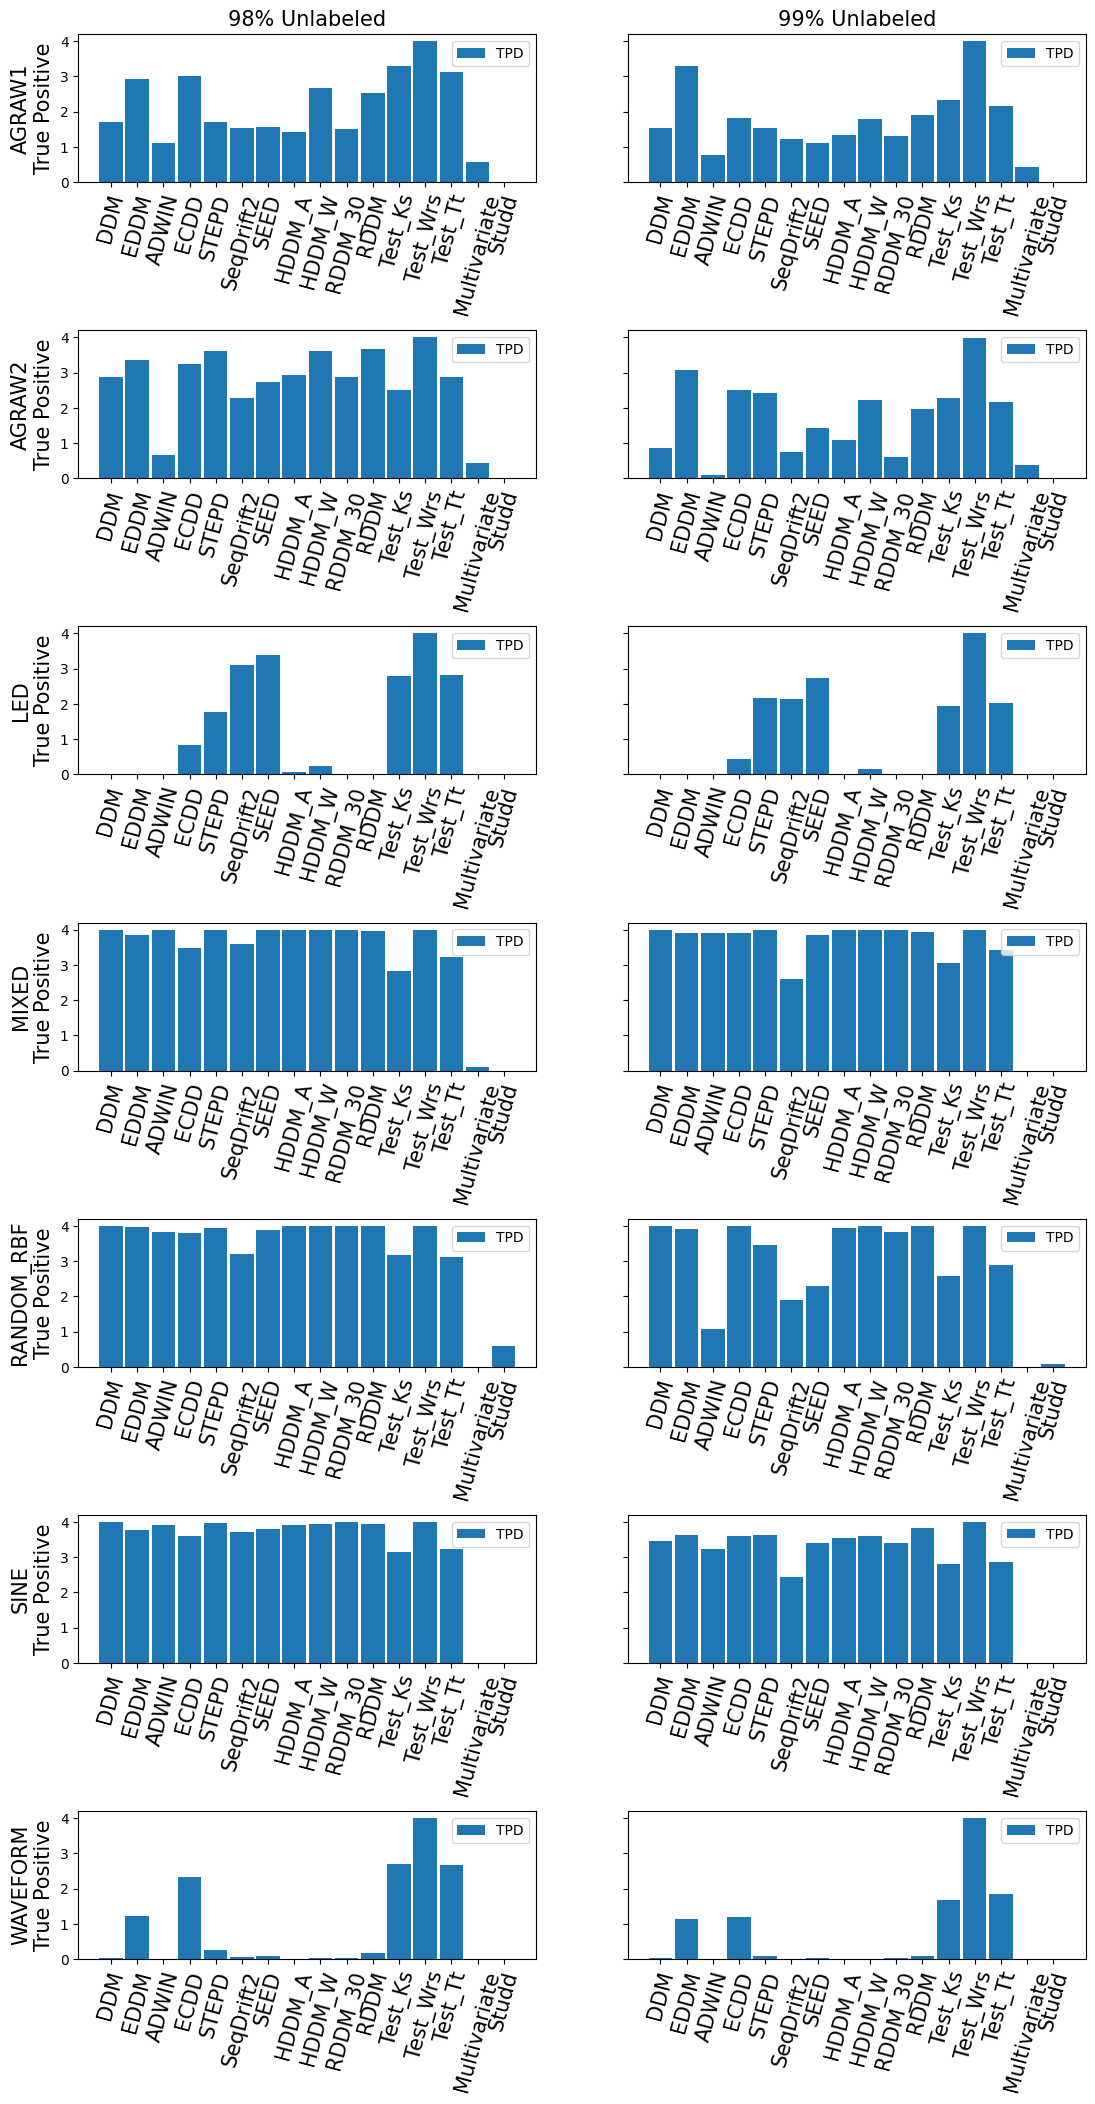

In [213]:
df = pd.read_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv')
data_sets = ['AGRAW1', 'AGRAW2', 'LED', 'MIXED', 'RANDOM_RBF', 'SINE', 'WAVEFORM']
partialy_drift = [98, 99]
fig_size = (13,25)
generate_bar_plot(df, data_sets, partialy_drift, metric_name, type_drift, drift_size, fig_size)

## Abrupt Drift and Partially Labeled Data Stream 95%, 96%, 97% (TPD)

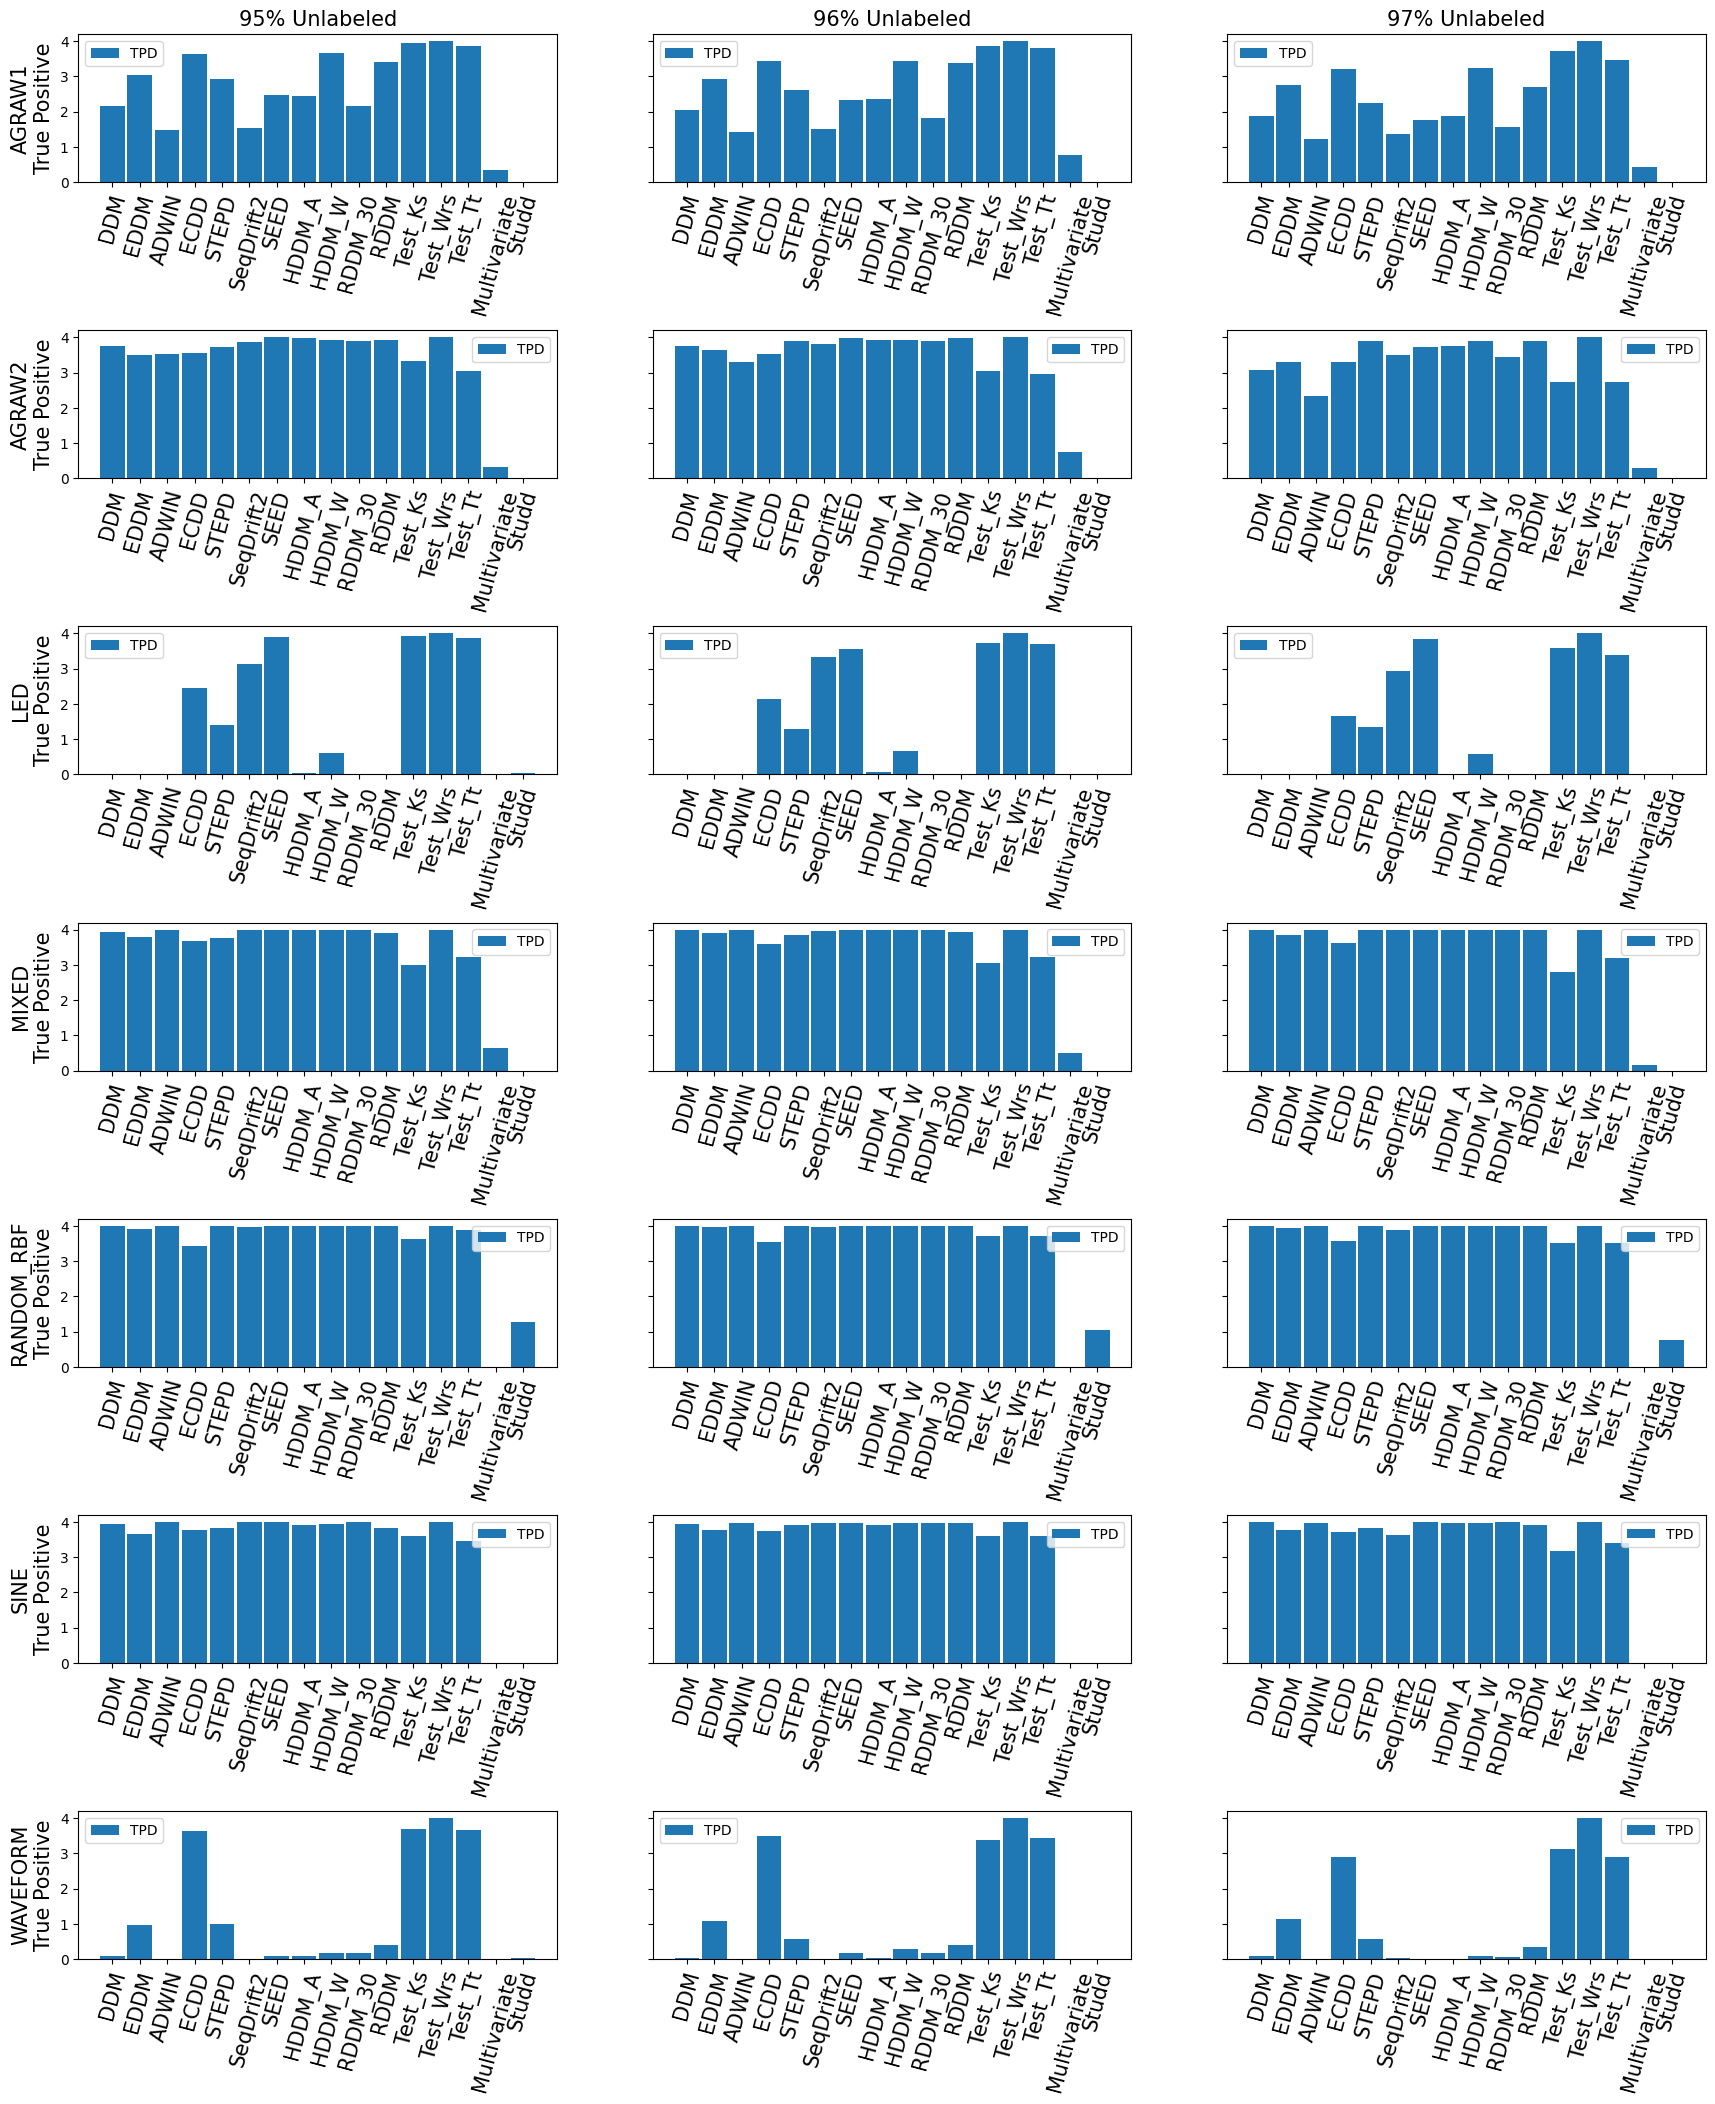

In [214]:
df = pd.read_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv')
data_sets = ['AGRAW1', 'AGRAW2', 'LED', 'MIXED', 'RANDOM_RBF', 'SINE', 'WAVEFORM']
partialy_drift = [95, 96, 97]
fig_size = (21,25)
generate_bar_plot(df, data_sets, partialy_drift, metric_name, type_drift, drift_size, fig_size)

## Gradual Drift and Partially Labeled Data Stream 95%, 96%, 97% (TPD)

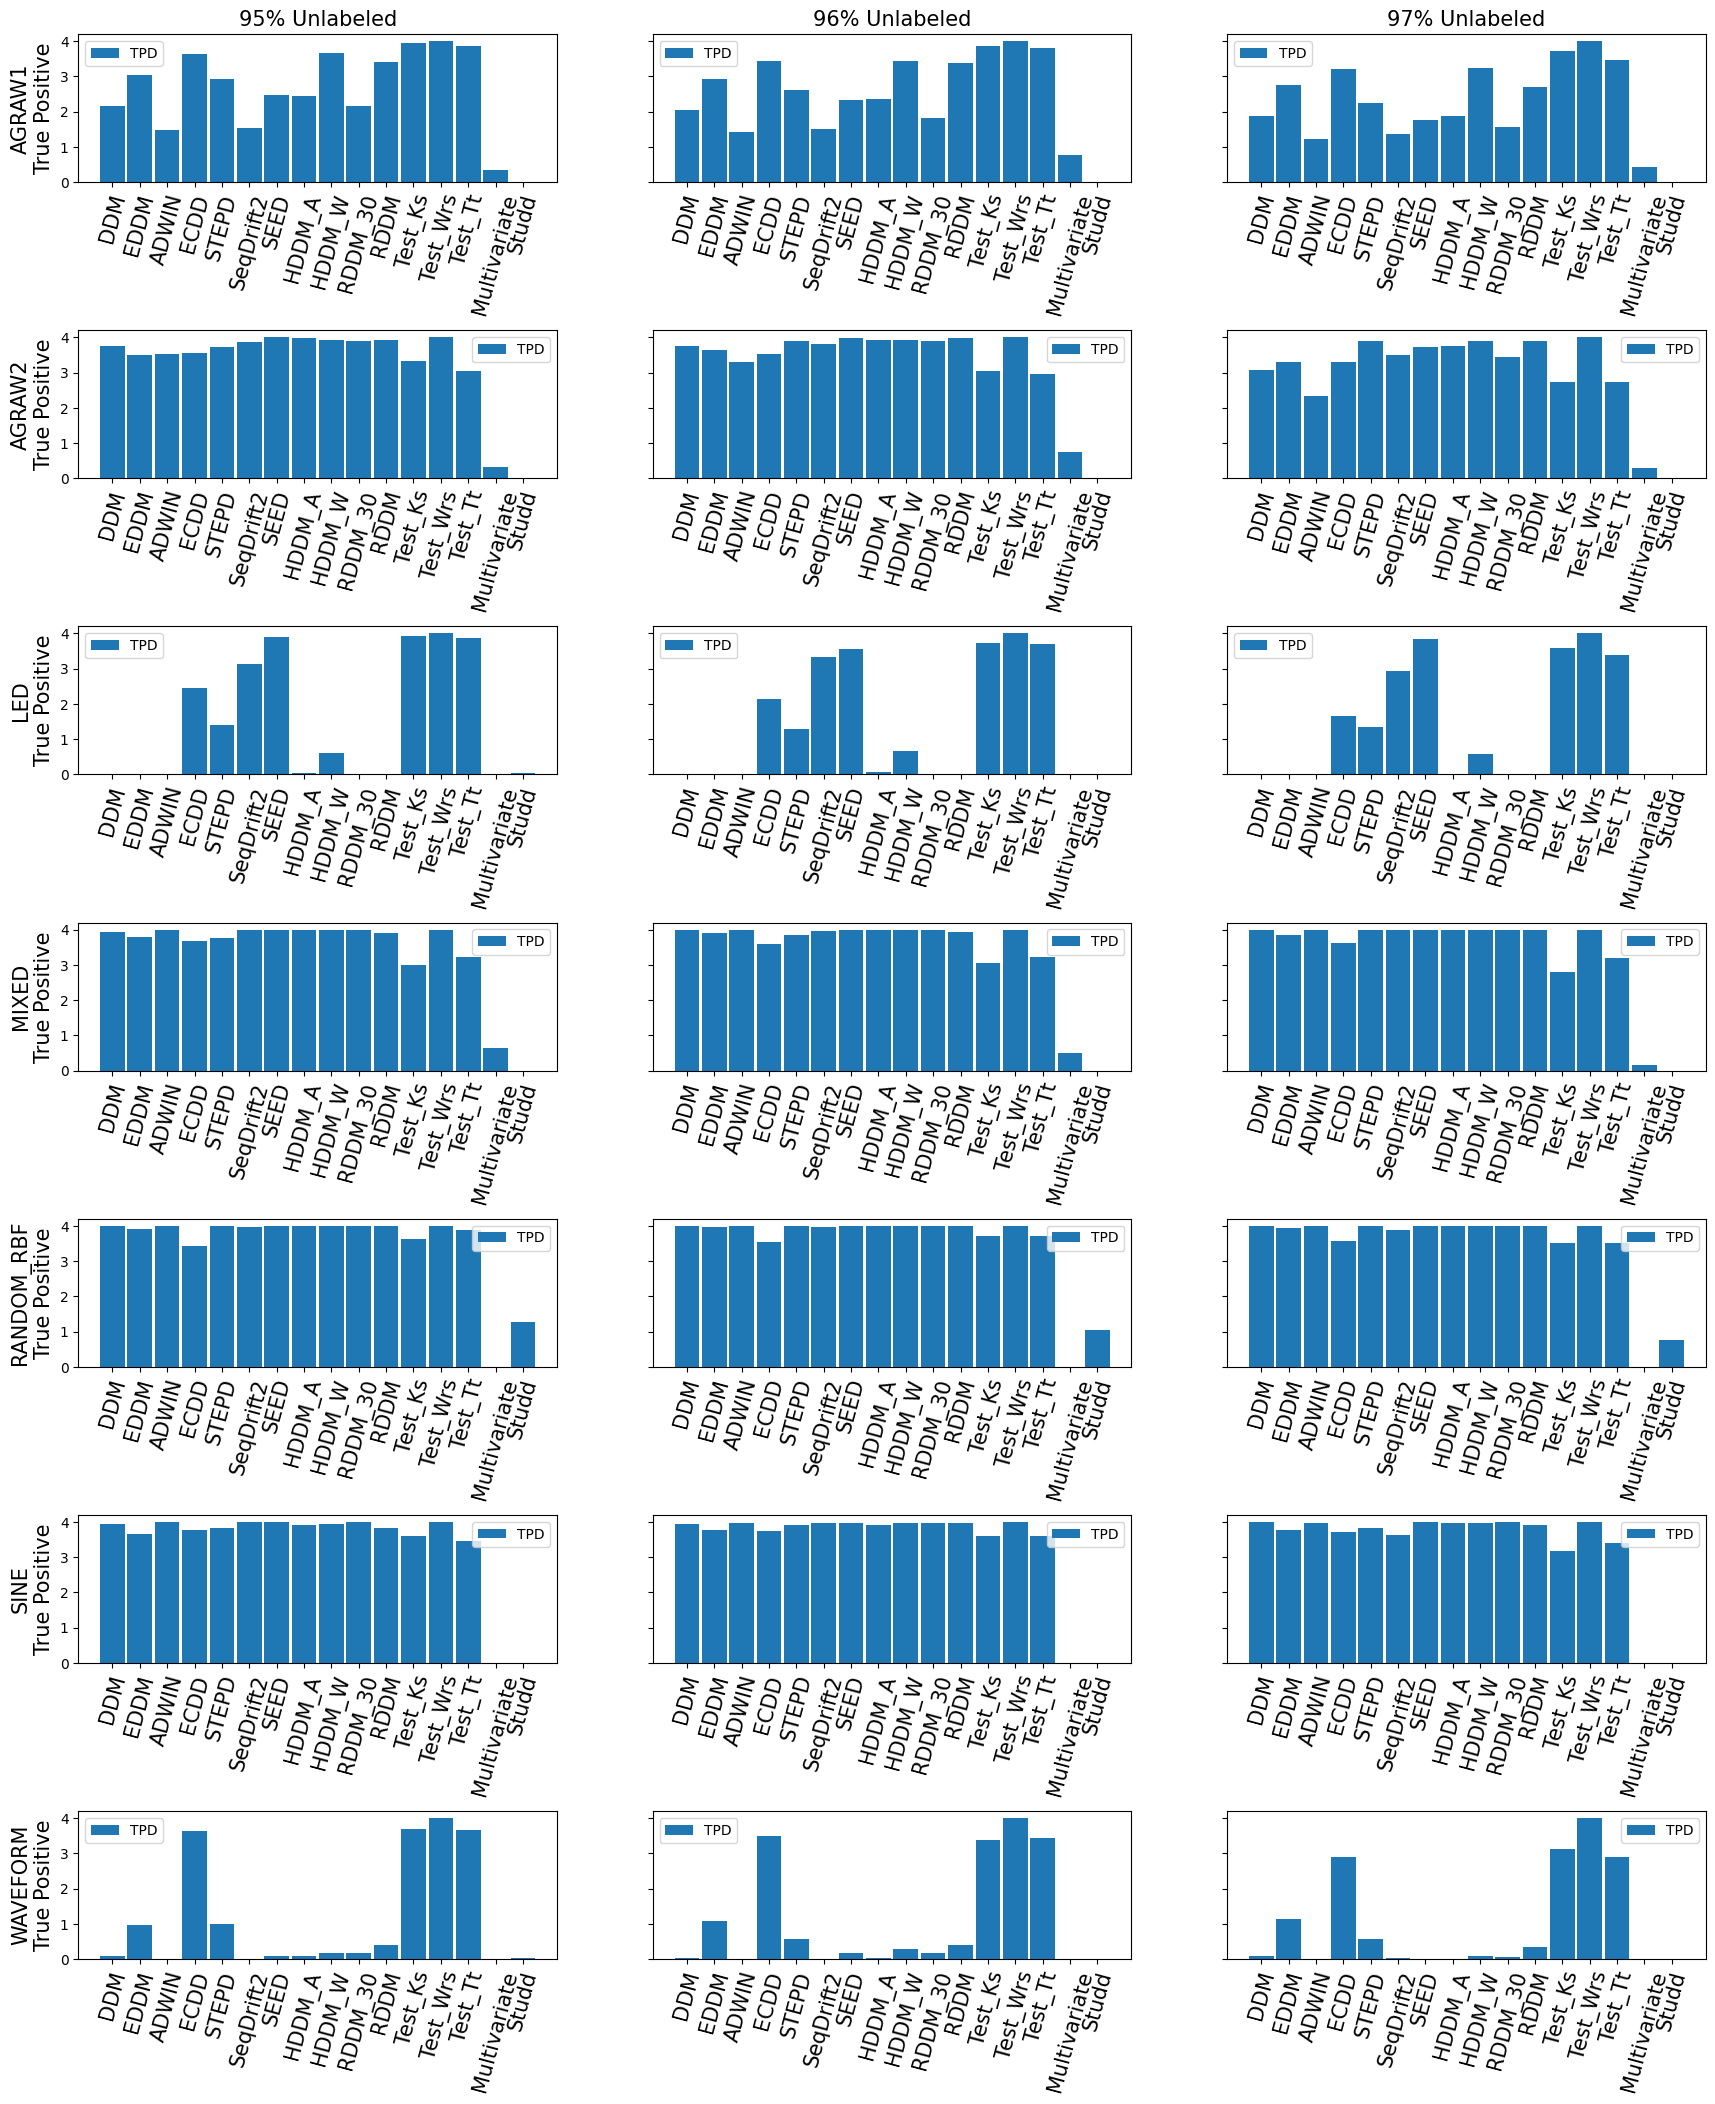

In [216]:
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [95, 96, 97]
type_drift = "Gradual"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "true changes detected"
df = pd.read_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv')
data_sets = ['AGRAW1', 'AGRAW2', 'LED', 'MIXED', 'RANDOM_RBF', 'SINE', 'WAVEFORM']
fig_size = (21,25)
generate_bar_plot(df, data_sets, partialy_drift, metric_name, type_drift, drift_size, fig_size)

## Gradual Drift and Partially Labeled Data Stream 98%, 99% (TPD)

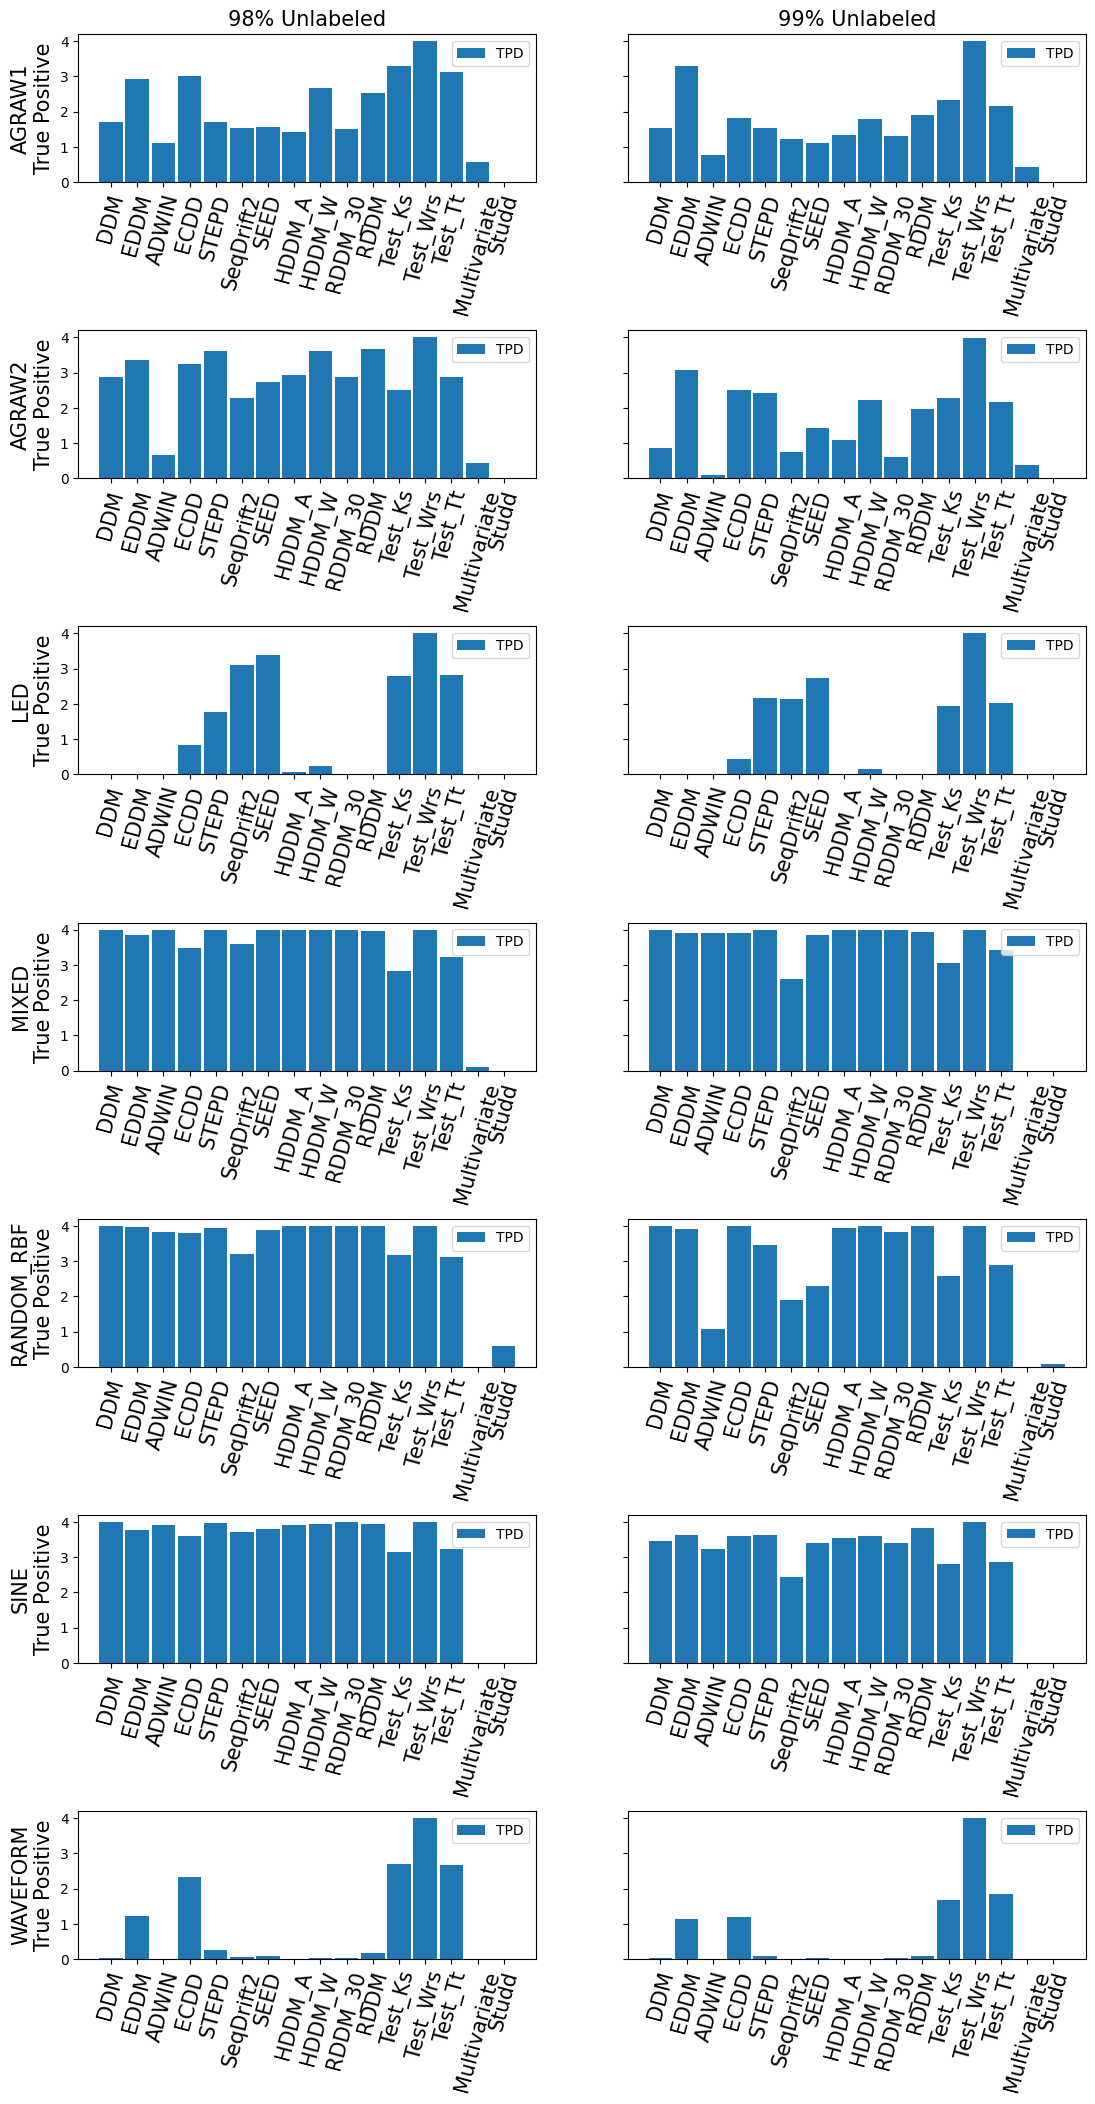

In [217]:
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [98, 99]
type_drift = "Gradual"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "true changes detected"
df = pd.read_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv')
data_sets = ['AGRAW1', 'AGRAW2', 'LED', 'MIXED', 'RANDOM_RBF', 'SINE', 'WAVEFORM']
fig_size = (13,25)
generate_bar_plot(df, data_sets, partialy_drift, metric_name, type_drift, drift_size, fig_size)

## Abrupt Drift and Partially Labeled Data Stream 98%, 99% (TDD)

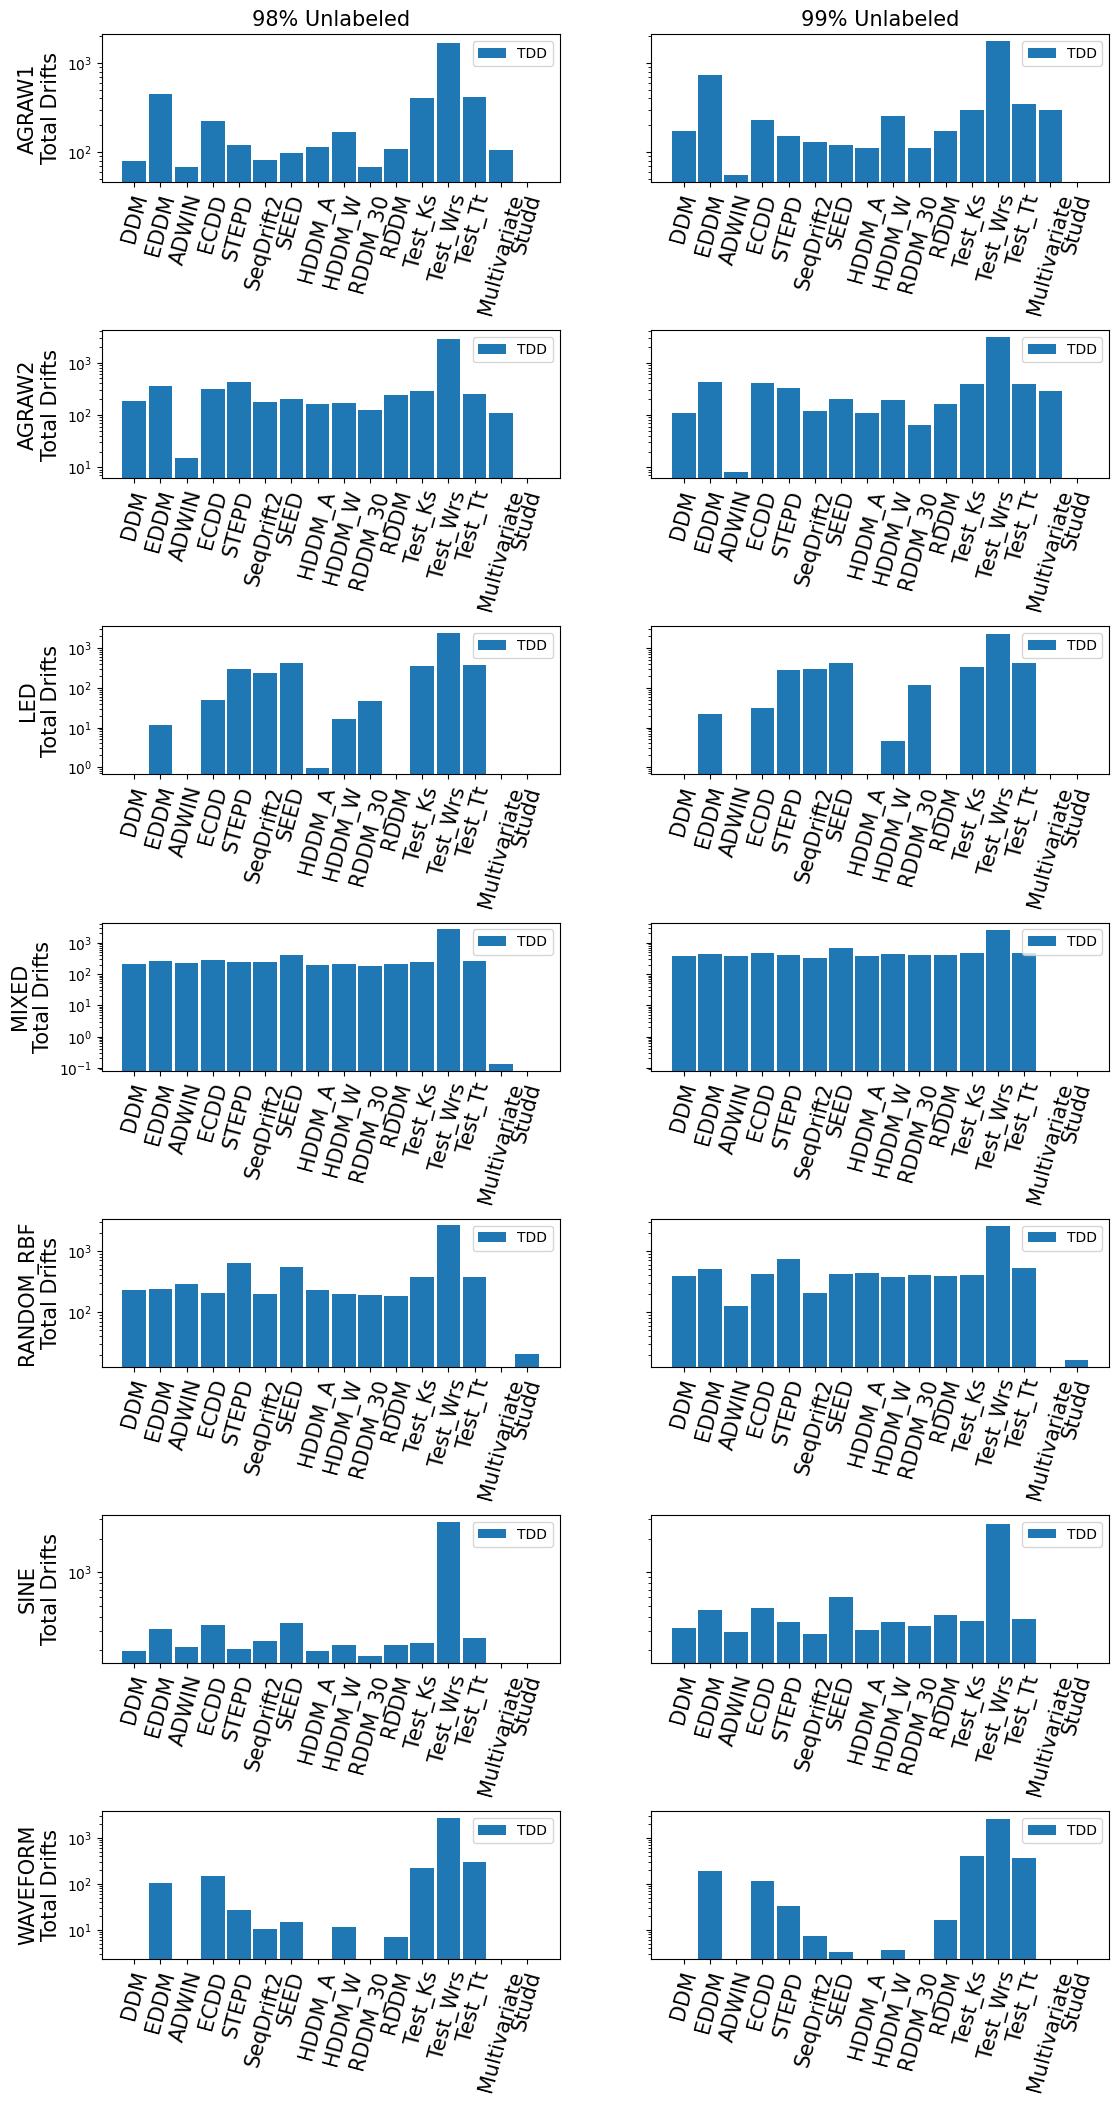

In [235]:
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [98, 99]
type_drift = "Abrupt"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "detected changes"
metric_name_label = "Total Drifts"
label_bar = "TDD"
df = pd.read_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv')
data_sets = ['AGRAW1', 'AGRAW2', 'LED', 'MIXED', 'RANDOM_RBF', 'SINE', 'WAVEFORM']
fig_size = (13,25)
generate_bar_plot_metric(df, data_sets, partialy_drift, metric_name_label, type_drift, drift_size, fig_size, label_bar, y_log=True)

## Abrupt Drift and Partially Labeled Data Stream 95%, 96%, 97% (TDD)

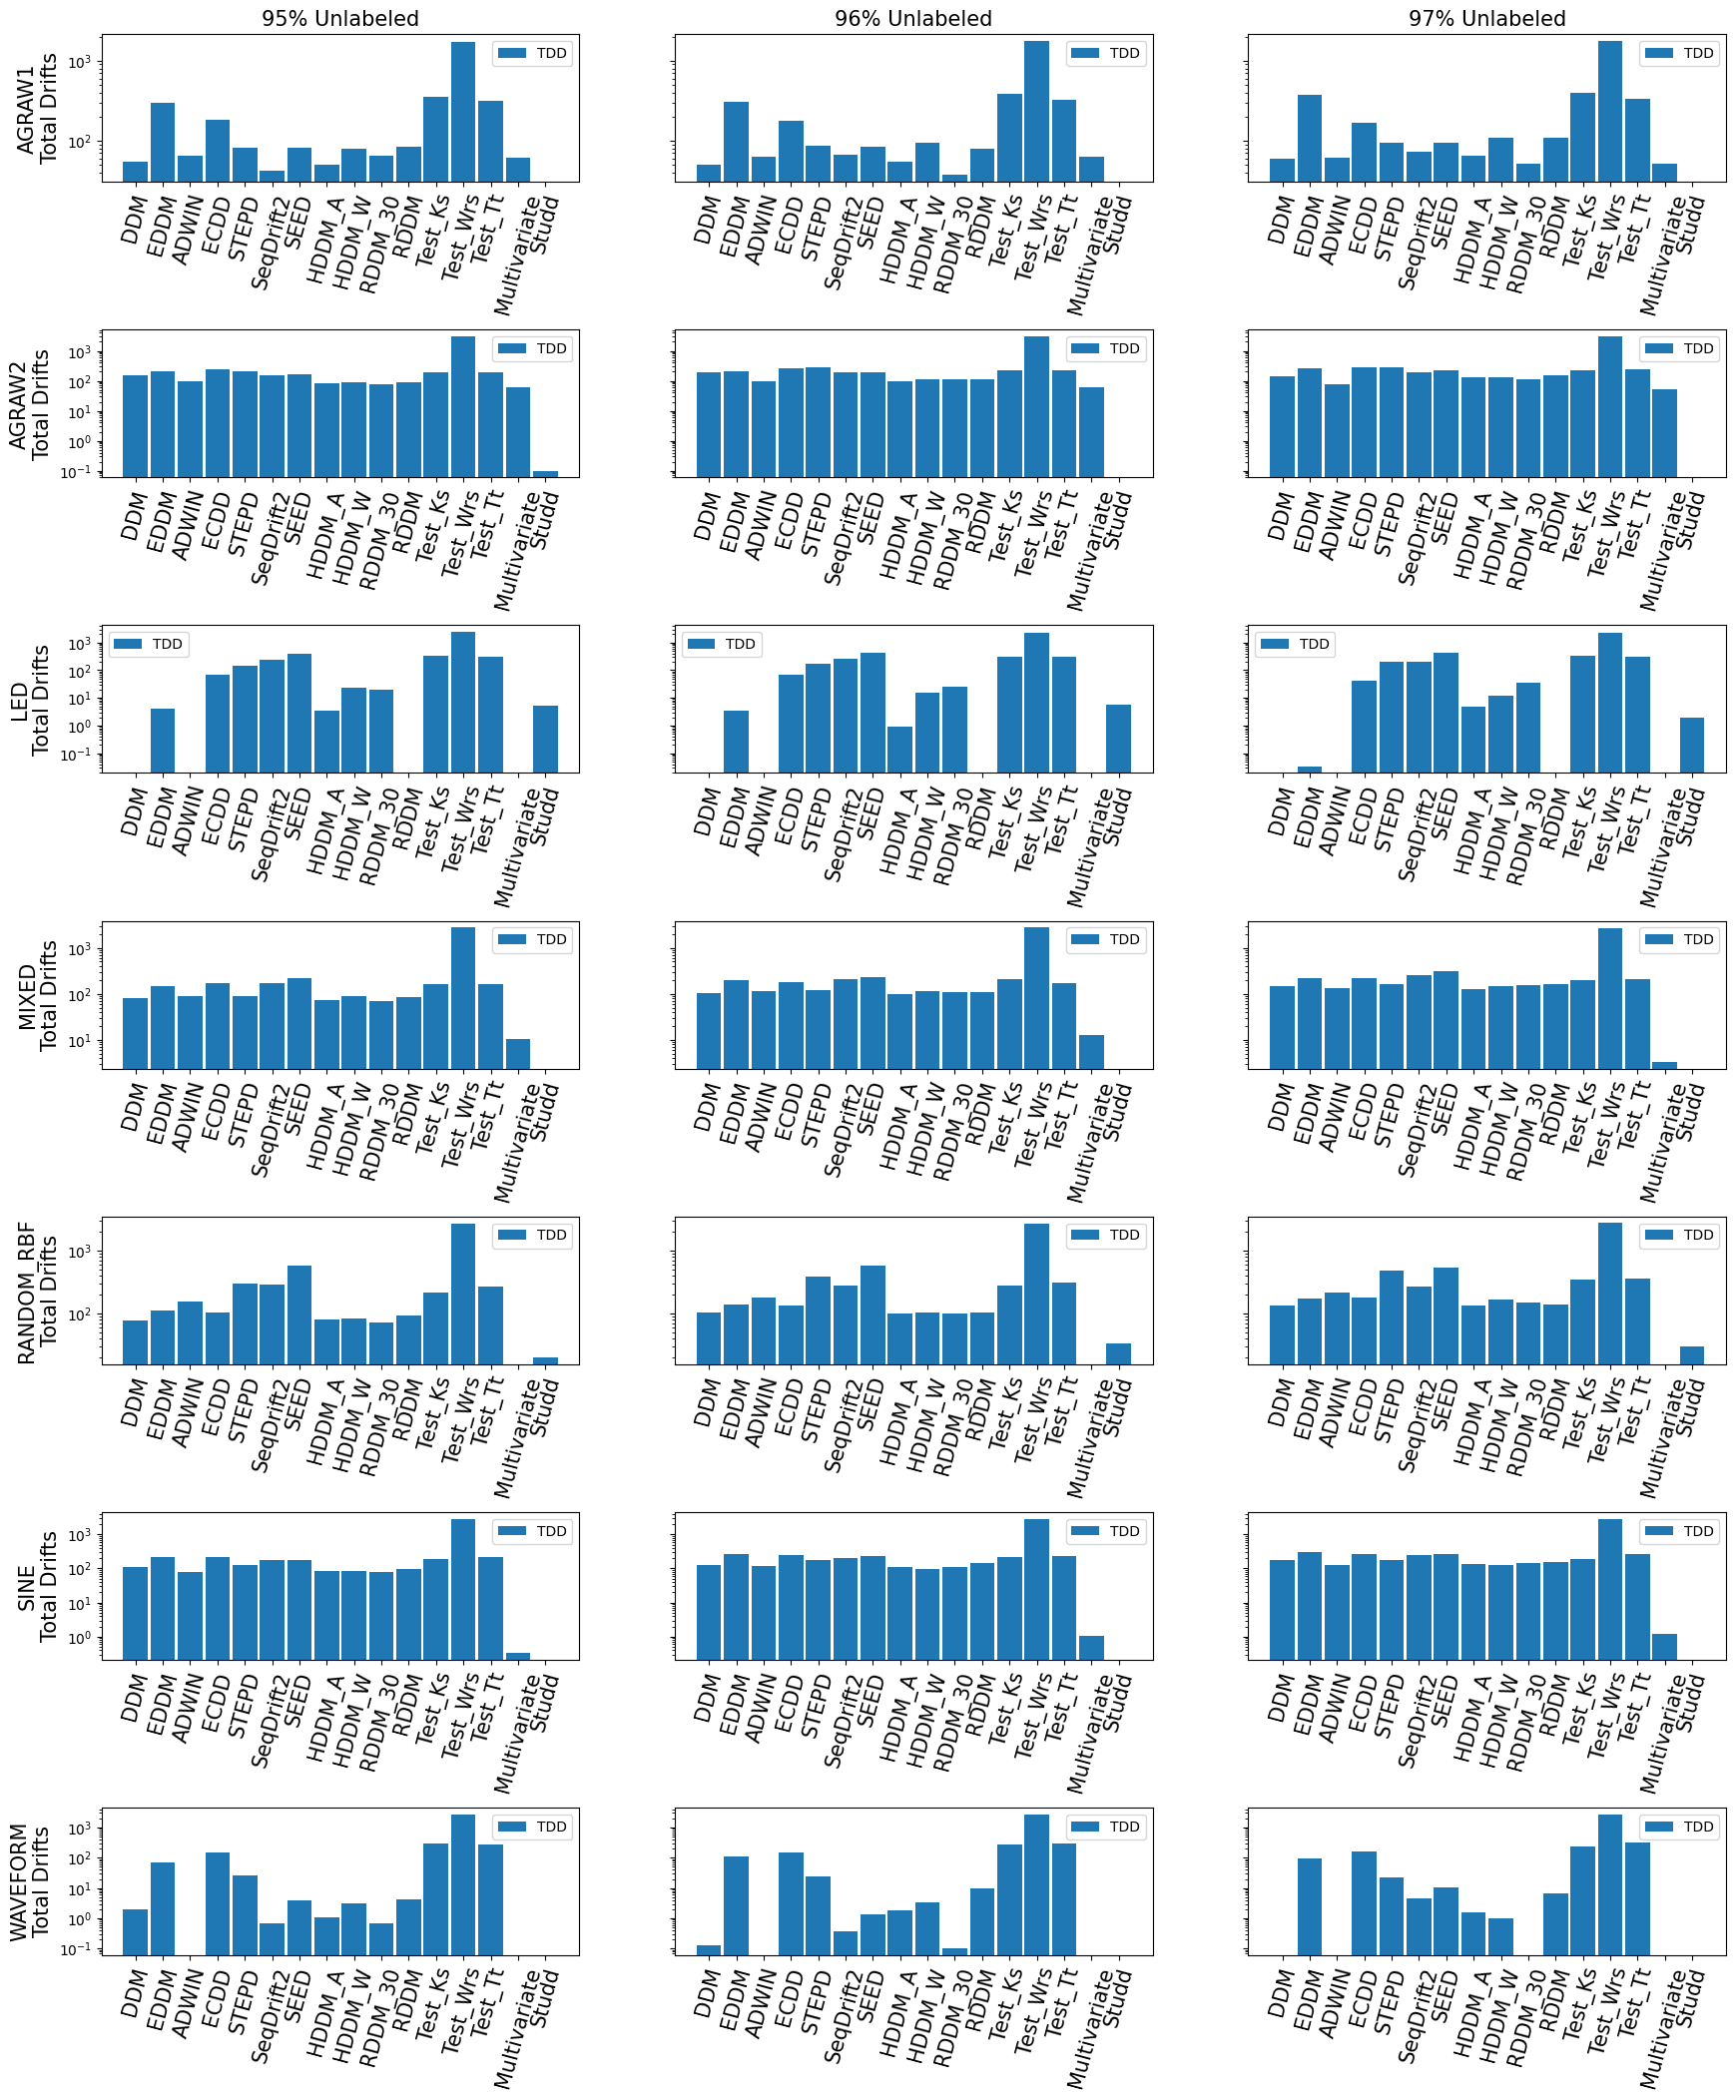

In [232]:
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [95, 96, 97]
type_drift = "Abrupt"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "detected changes"
metric_name_label = "Total Drifts"
label_bar = "TDD"
df = pd.read_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv')
data_sets = ['AGRAW1', 'AGRAW2', 'LED', 'MIXED', 'RANDOM_RBF', 'SINE', 'WAVEFORM']
fig_size = (21,25)
generate_bar_plot_metric(df, data_sets, partialy_drift, metric_name_label, type_drift, drift_size, fig_size, label_bar, y_log=True)

## Gradual Drift and Partially Labeled Data Stream 95%, 96%, 97% (TDD)

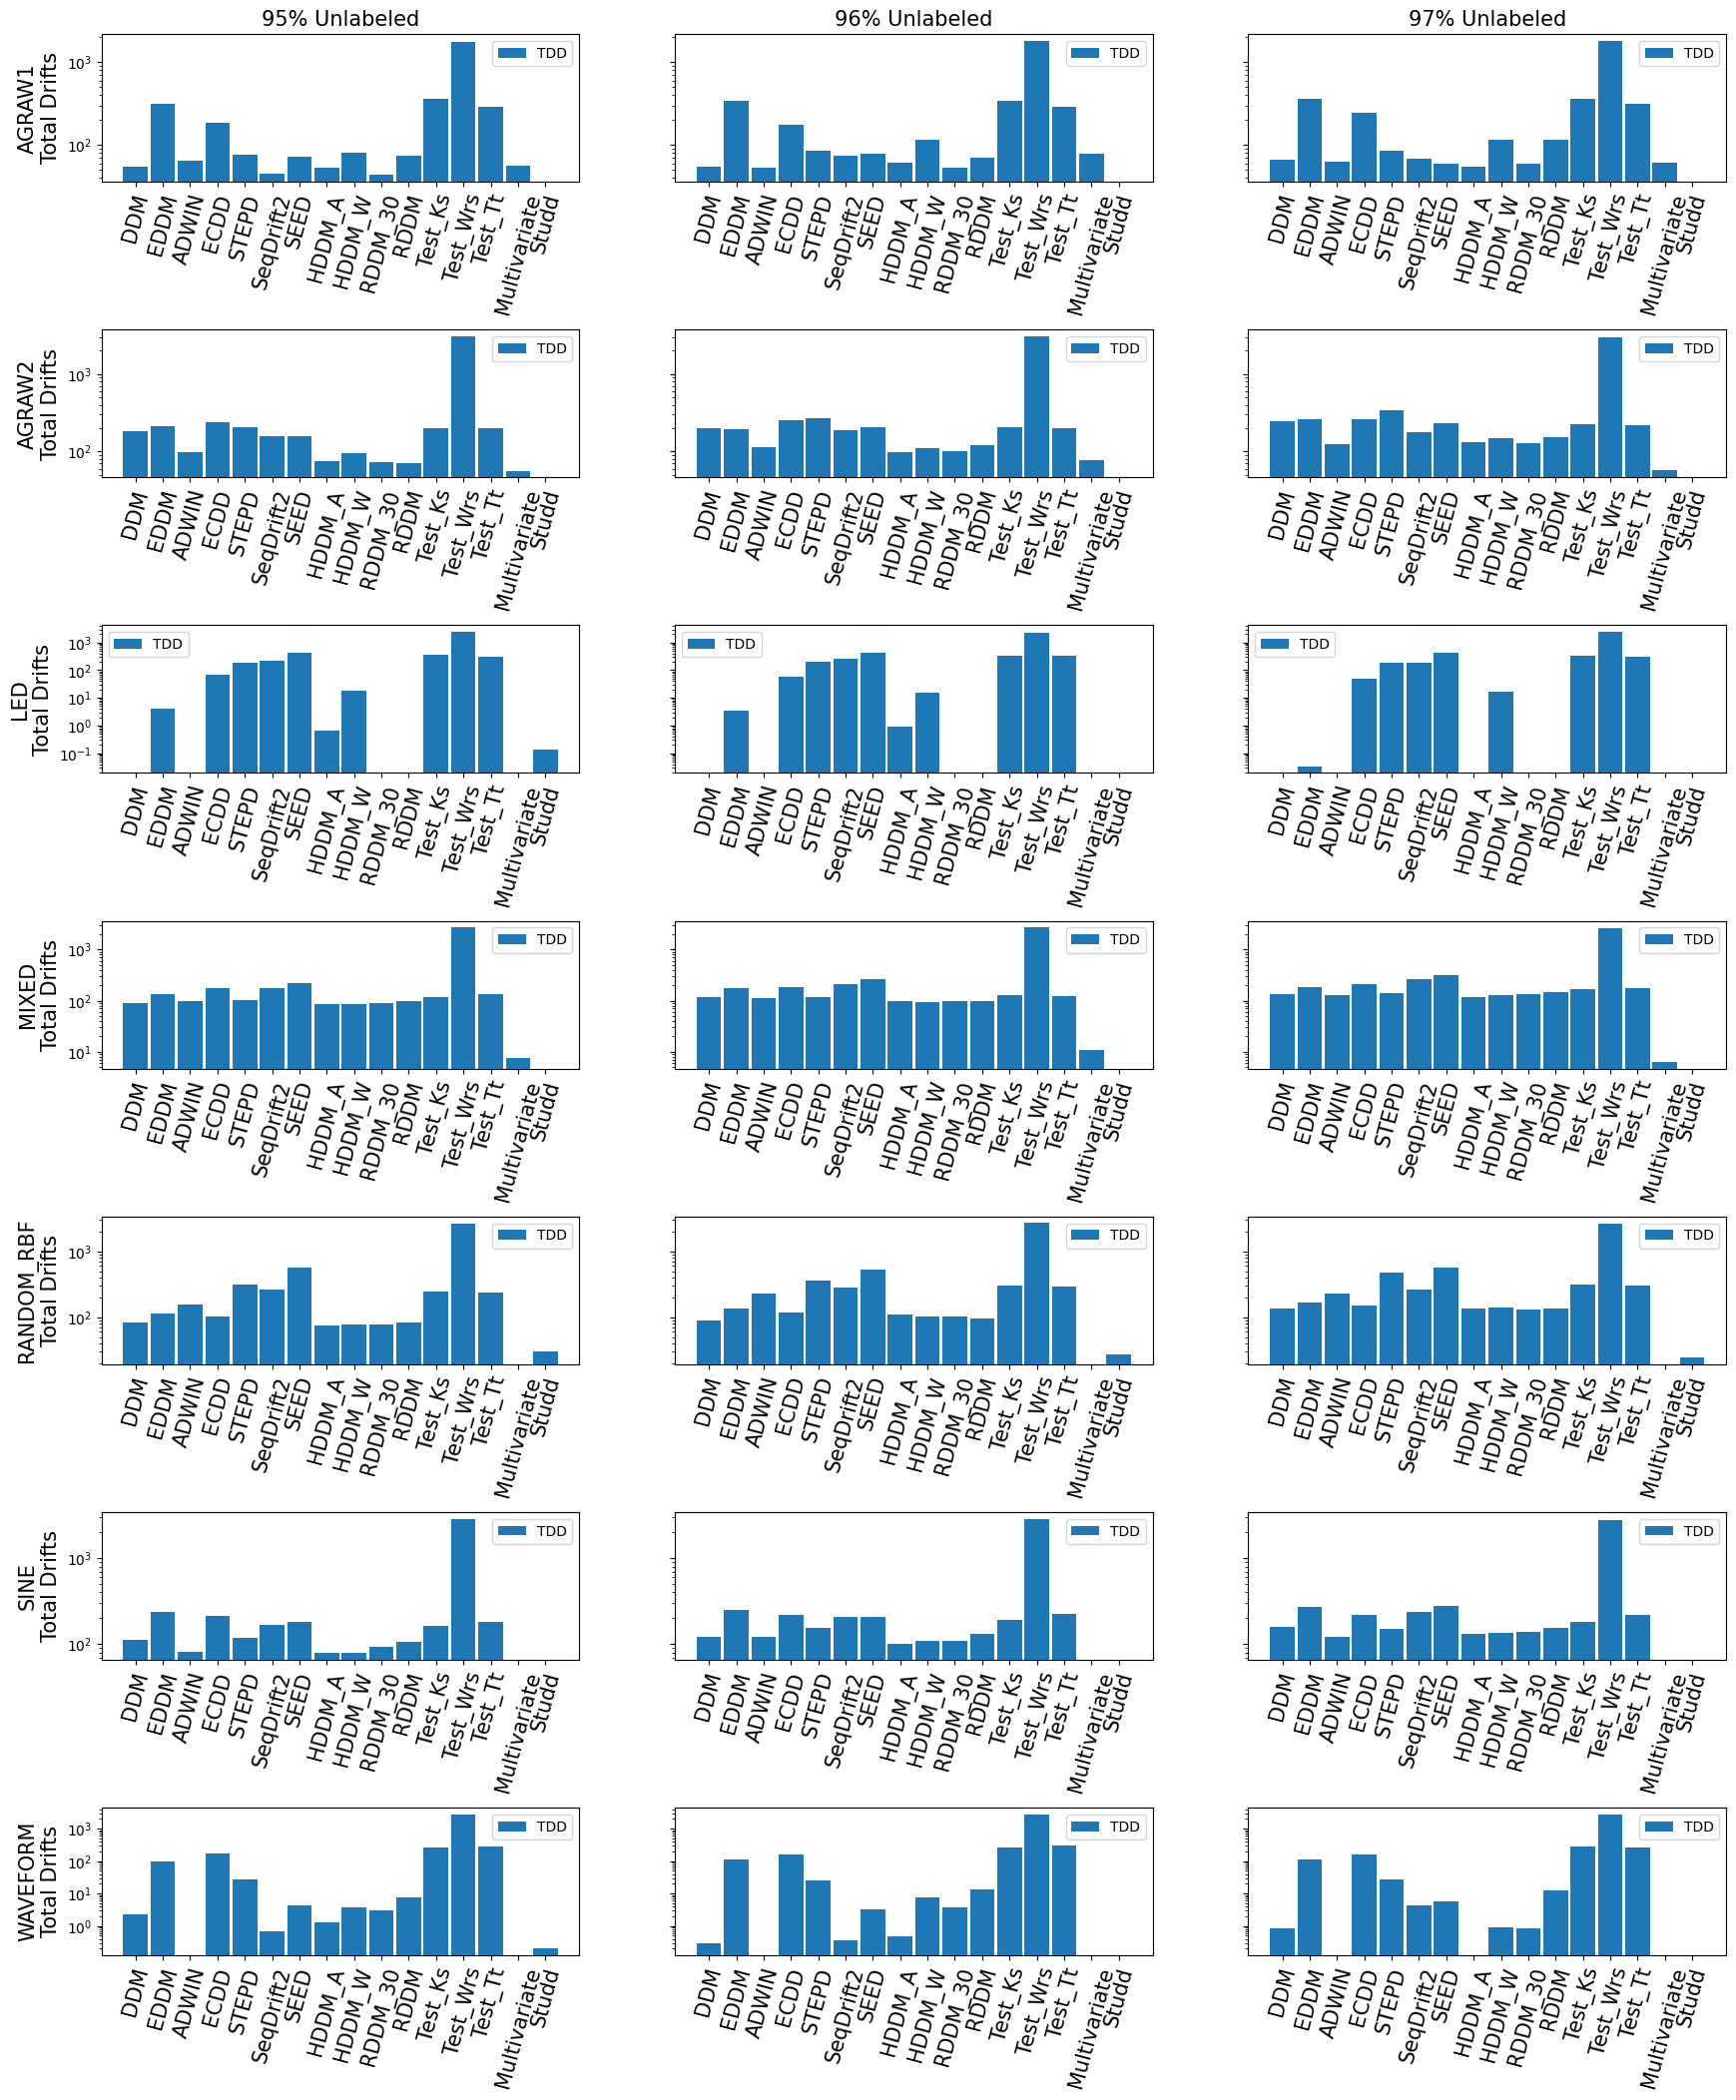

In [237]:
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [95, 96, 97]
type_drift = "Gradual"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "detected changes"
metric_name_label = "Total Drifts"
label_bar = "TDD"
df = pd.read_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv')
data_sets = ['AGRAW1', 'AGRAW2', 'LED', 'MIXED', 'RANDOM_RBF', 'SINE', 'WAVEFORM']
fig_size = (21,25)
generate_bar_plot_metric(df, data_sets, partialy_drift, metric_name_label, type_drift, drift_size, fig_size, label_bar, y_log=True)

## Gradual Drift and Partially Labeled Data Stream 98%, 99% (TDD)

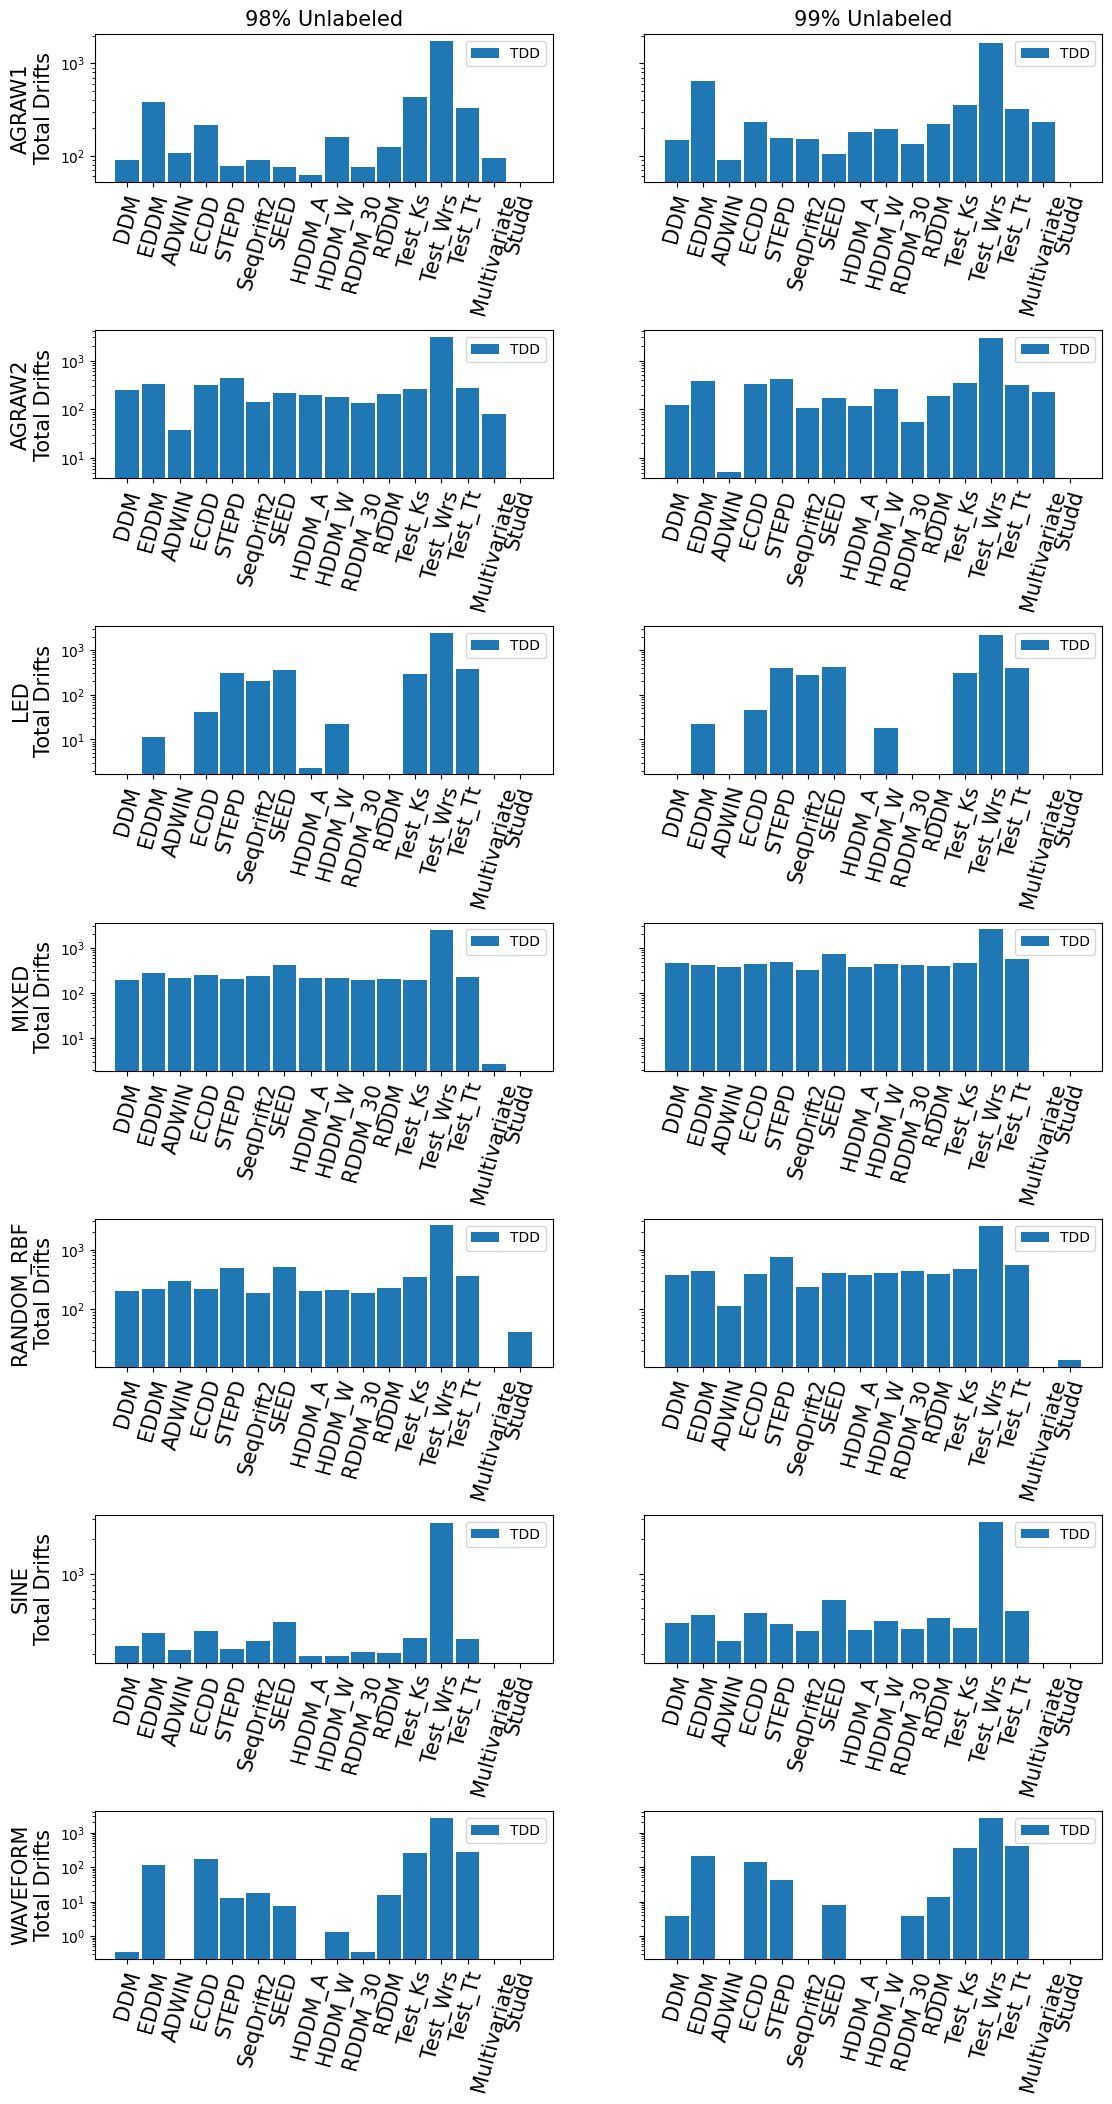

In [238]:
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [98, 99]
type_drift = "Gradual"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "detected changes"
metric_name_label = "Total Drifts"
label_bar = "TDD"
df = pd.read_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv')
data_sets = ['AGRAW1', 'AGRAW2', 'LED', 'MIXED', 'RANDOM_RBF', 'SINE', 'WAVEFORM']
fig_size = (13,25)
generate_bar_plot_metric(df, data_sets, partialy_drift, metric_name_label, type_drift, drift_size, fig_size, label_bar, y_log=True)

## Gradual Drift and Partially Labeled Data Stream 98%, 99% (TDDA)

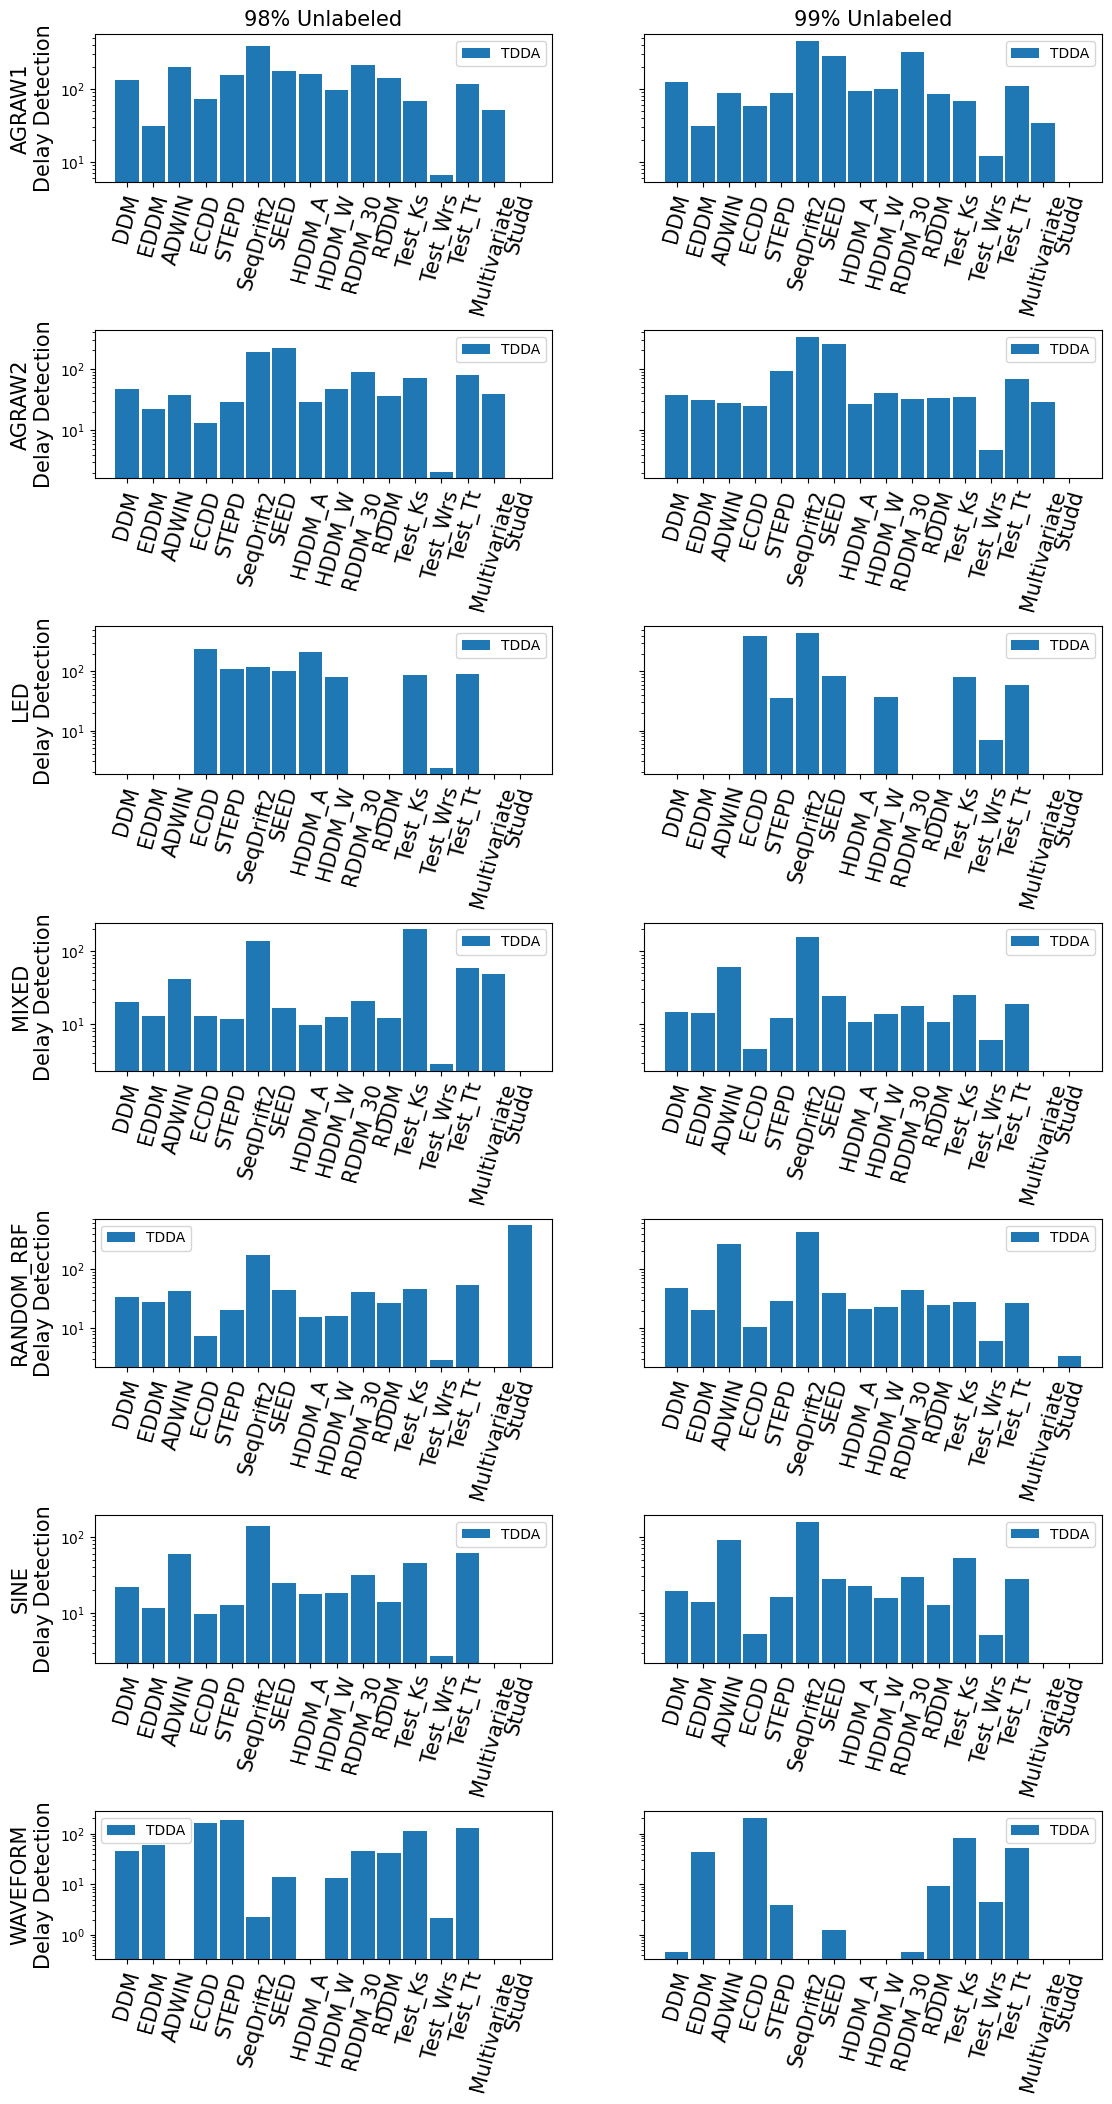

In [251]:
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [98, 99]
type_drift = "Gradual"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "delay true detection (average)"
metric_name_label = "Delay Detection"
label_bar = "TDDA"
df = pd.read_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv')
data_sets = ['AGRAW1', 'AGRAW2', 'LED', 'MIXED', 'RANDOM_RBF', 'SINE', 'WAVEFORM']
fig_size = (13,25)
generate_bar_plot_metric(df, data_sets, partialy_drift, metric_name_label, type_drift, drift_size, fig_size, label_bar, y_log=True)

## Gradual Drift and Partially Labeled Data Stream 95%, 96%, 97% (TDDA)

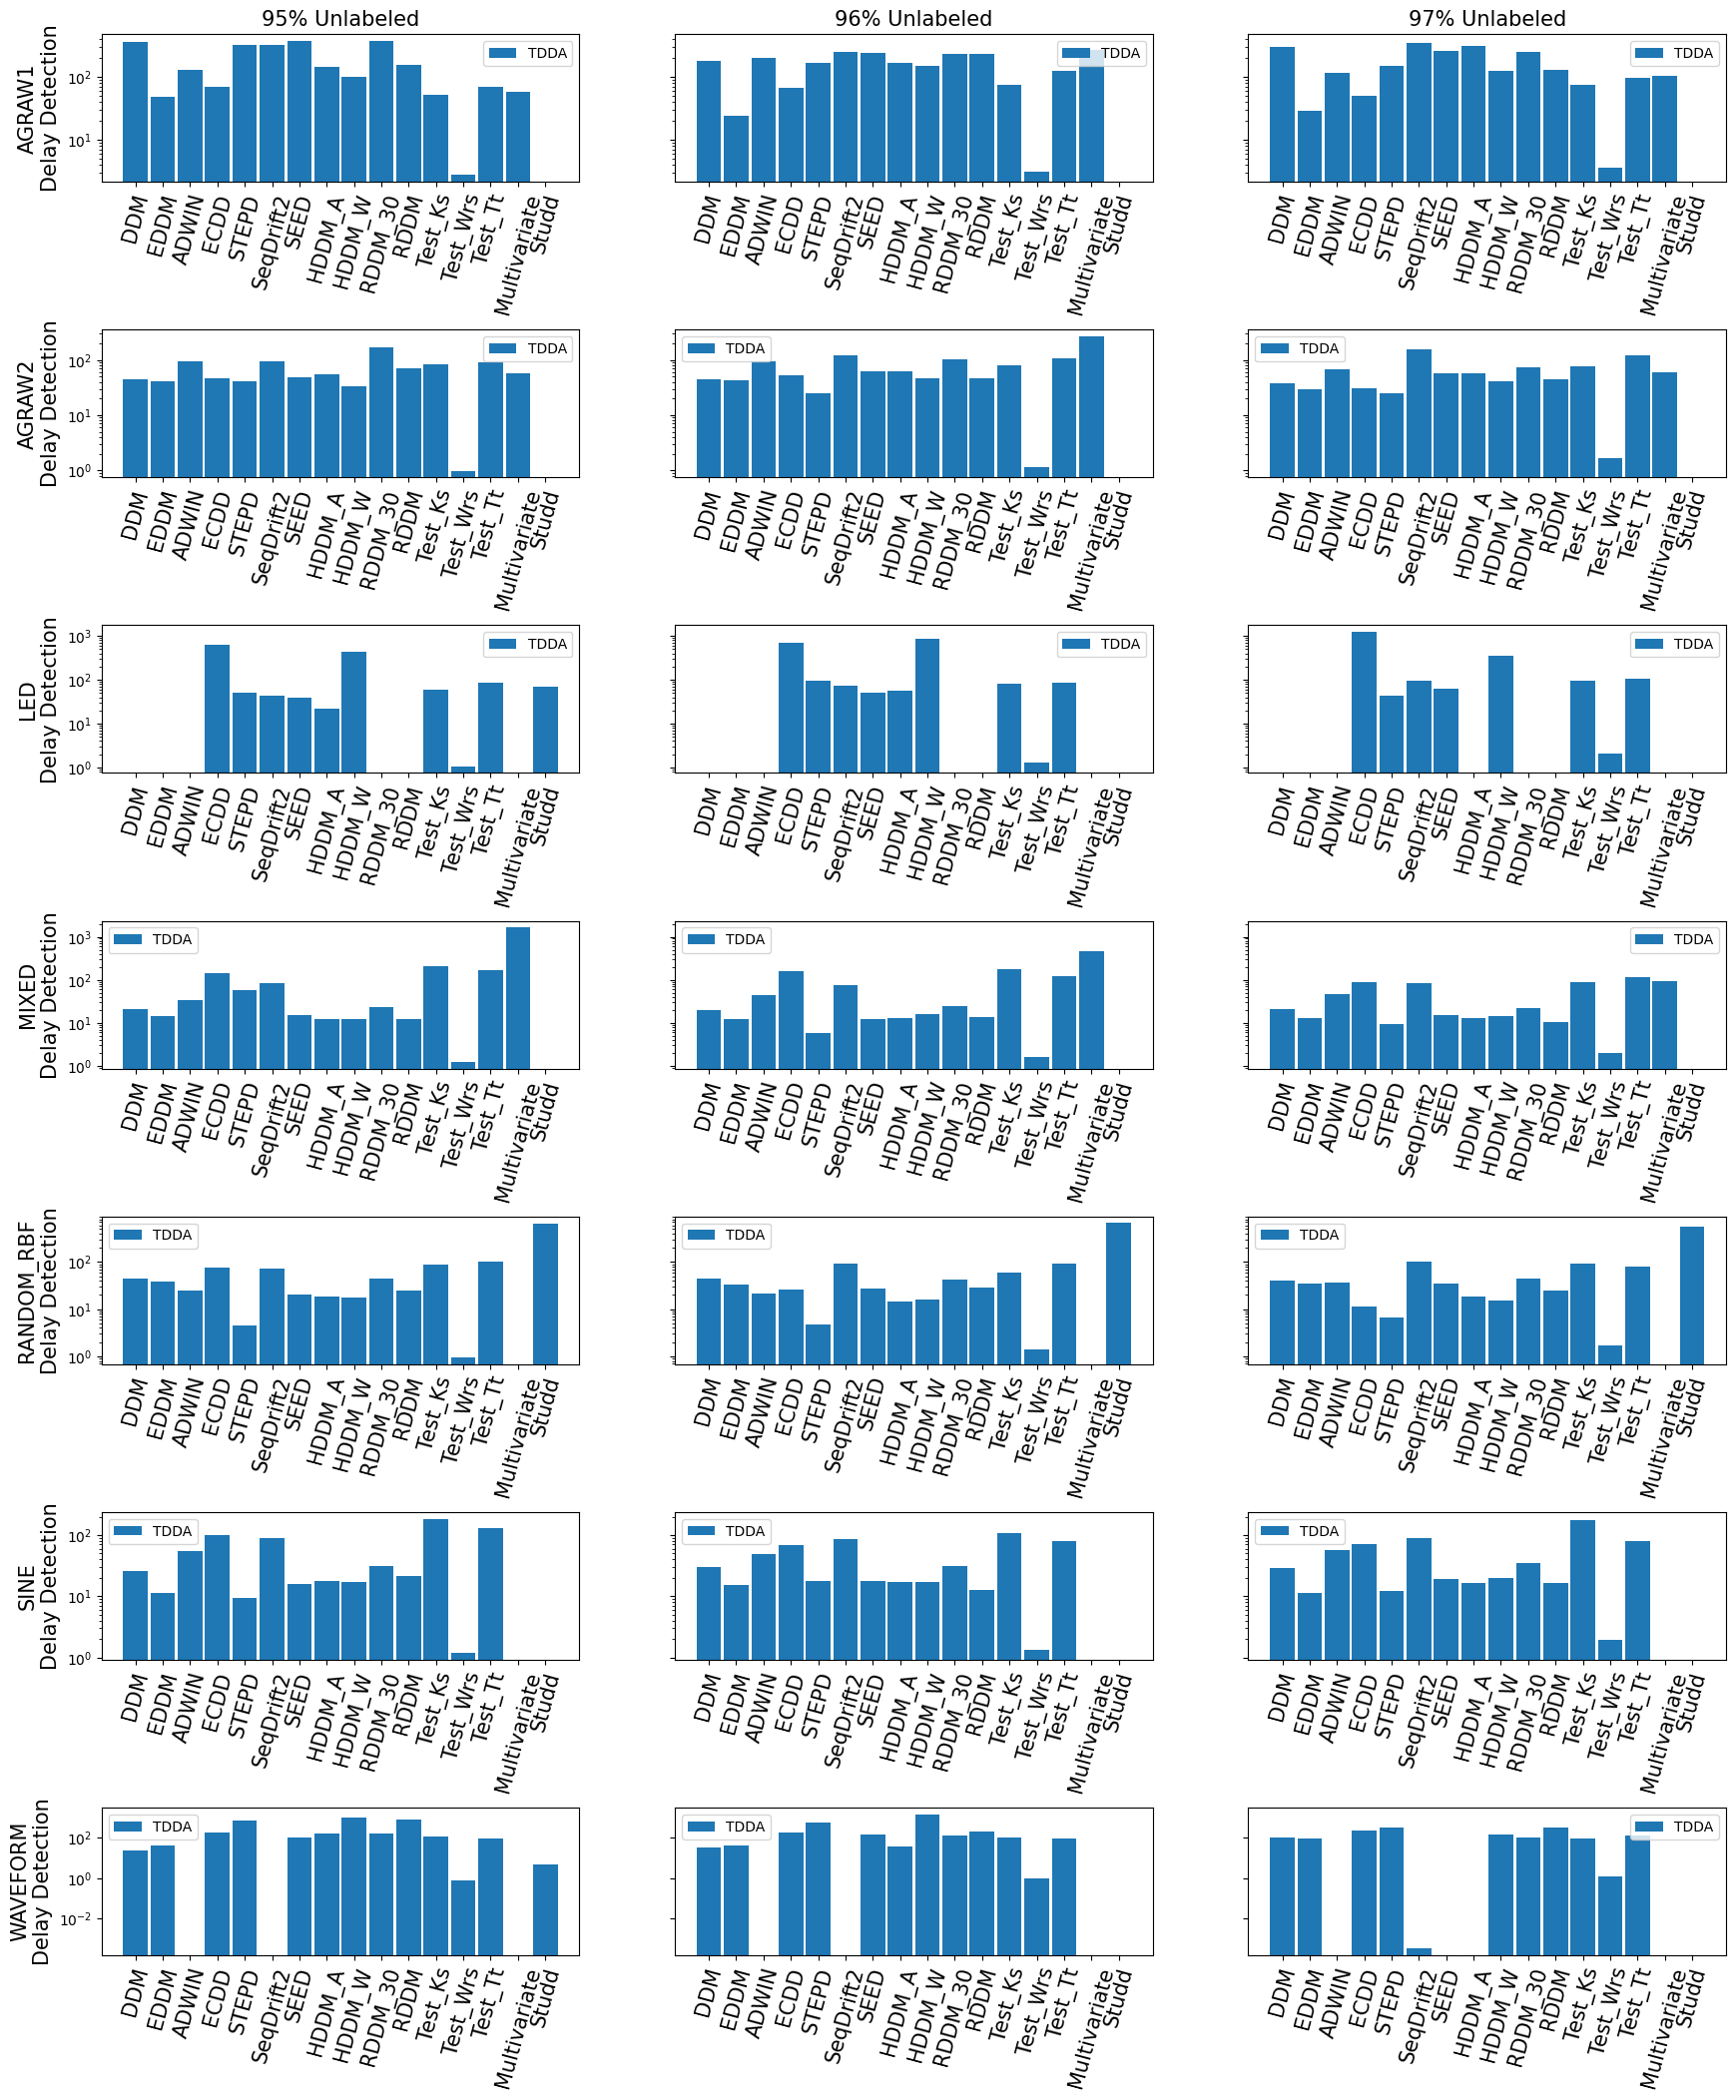

In [253]:
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [95, 96, 97]
type_drift = "Gradual"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "delay true detection (average)"
metric_name_label = "Delay Detection"
label_bar = "TDDA"
df = pd.read_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv')
data_sets = ['AGRAW1', 'AGRAW2', 'LED', 'MIXED', 'RANDOM_RBF', 'SINE', 'WAVEFORM']
fig_size = (21,25)
generate_bar_plot_metric(df, data_sets, partialy_drift, metric_name_label, type_drift, drift_size, fig_size, label_bar, y_log=True)

## Abrupt Drift and Partially Labeled Data Stream 95%, 96%, 97% (TDDA)

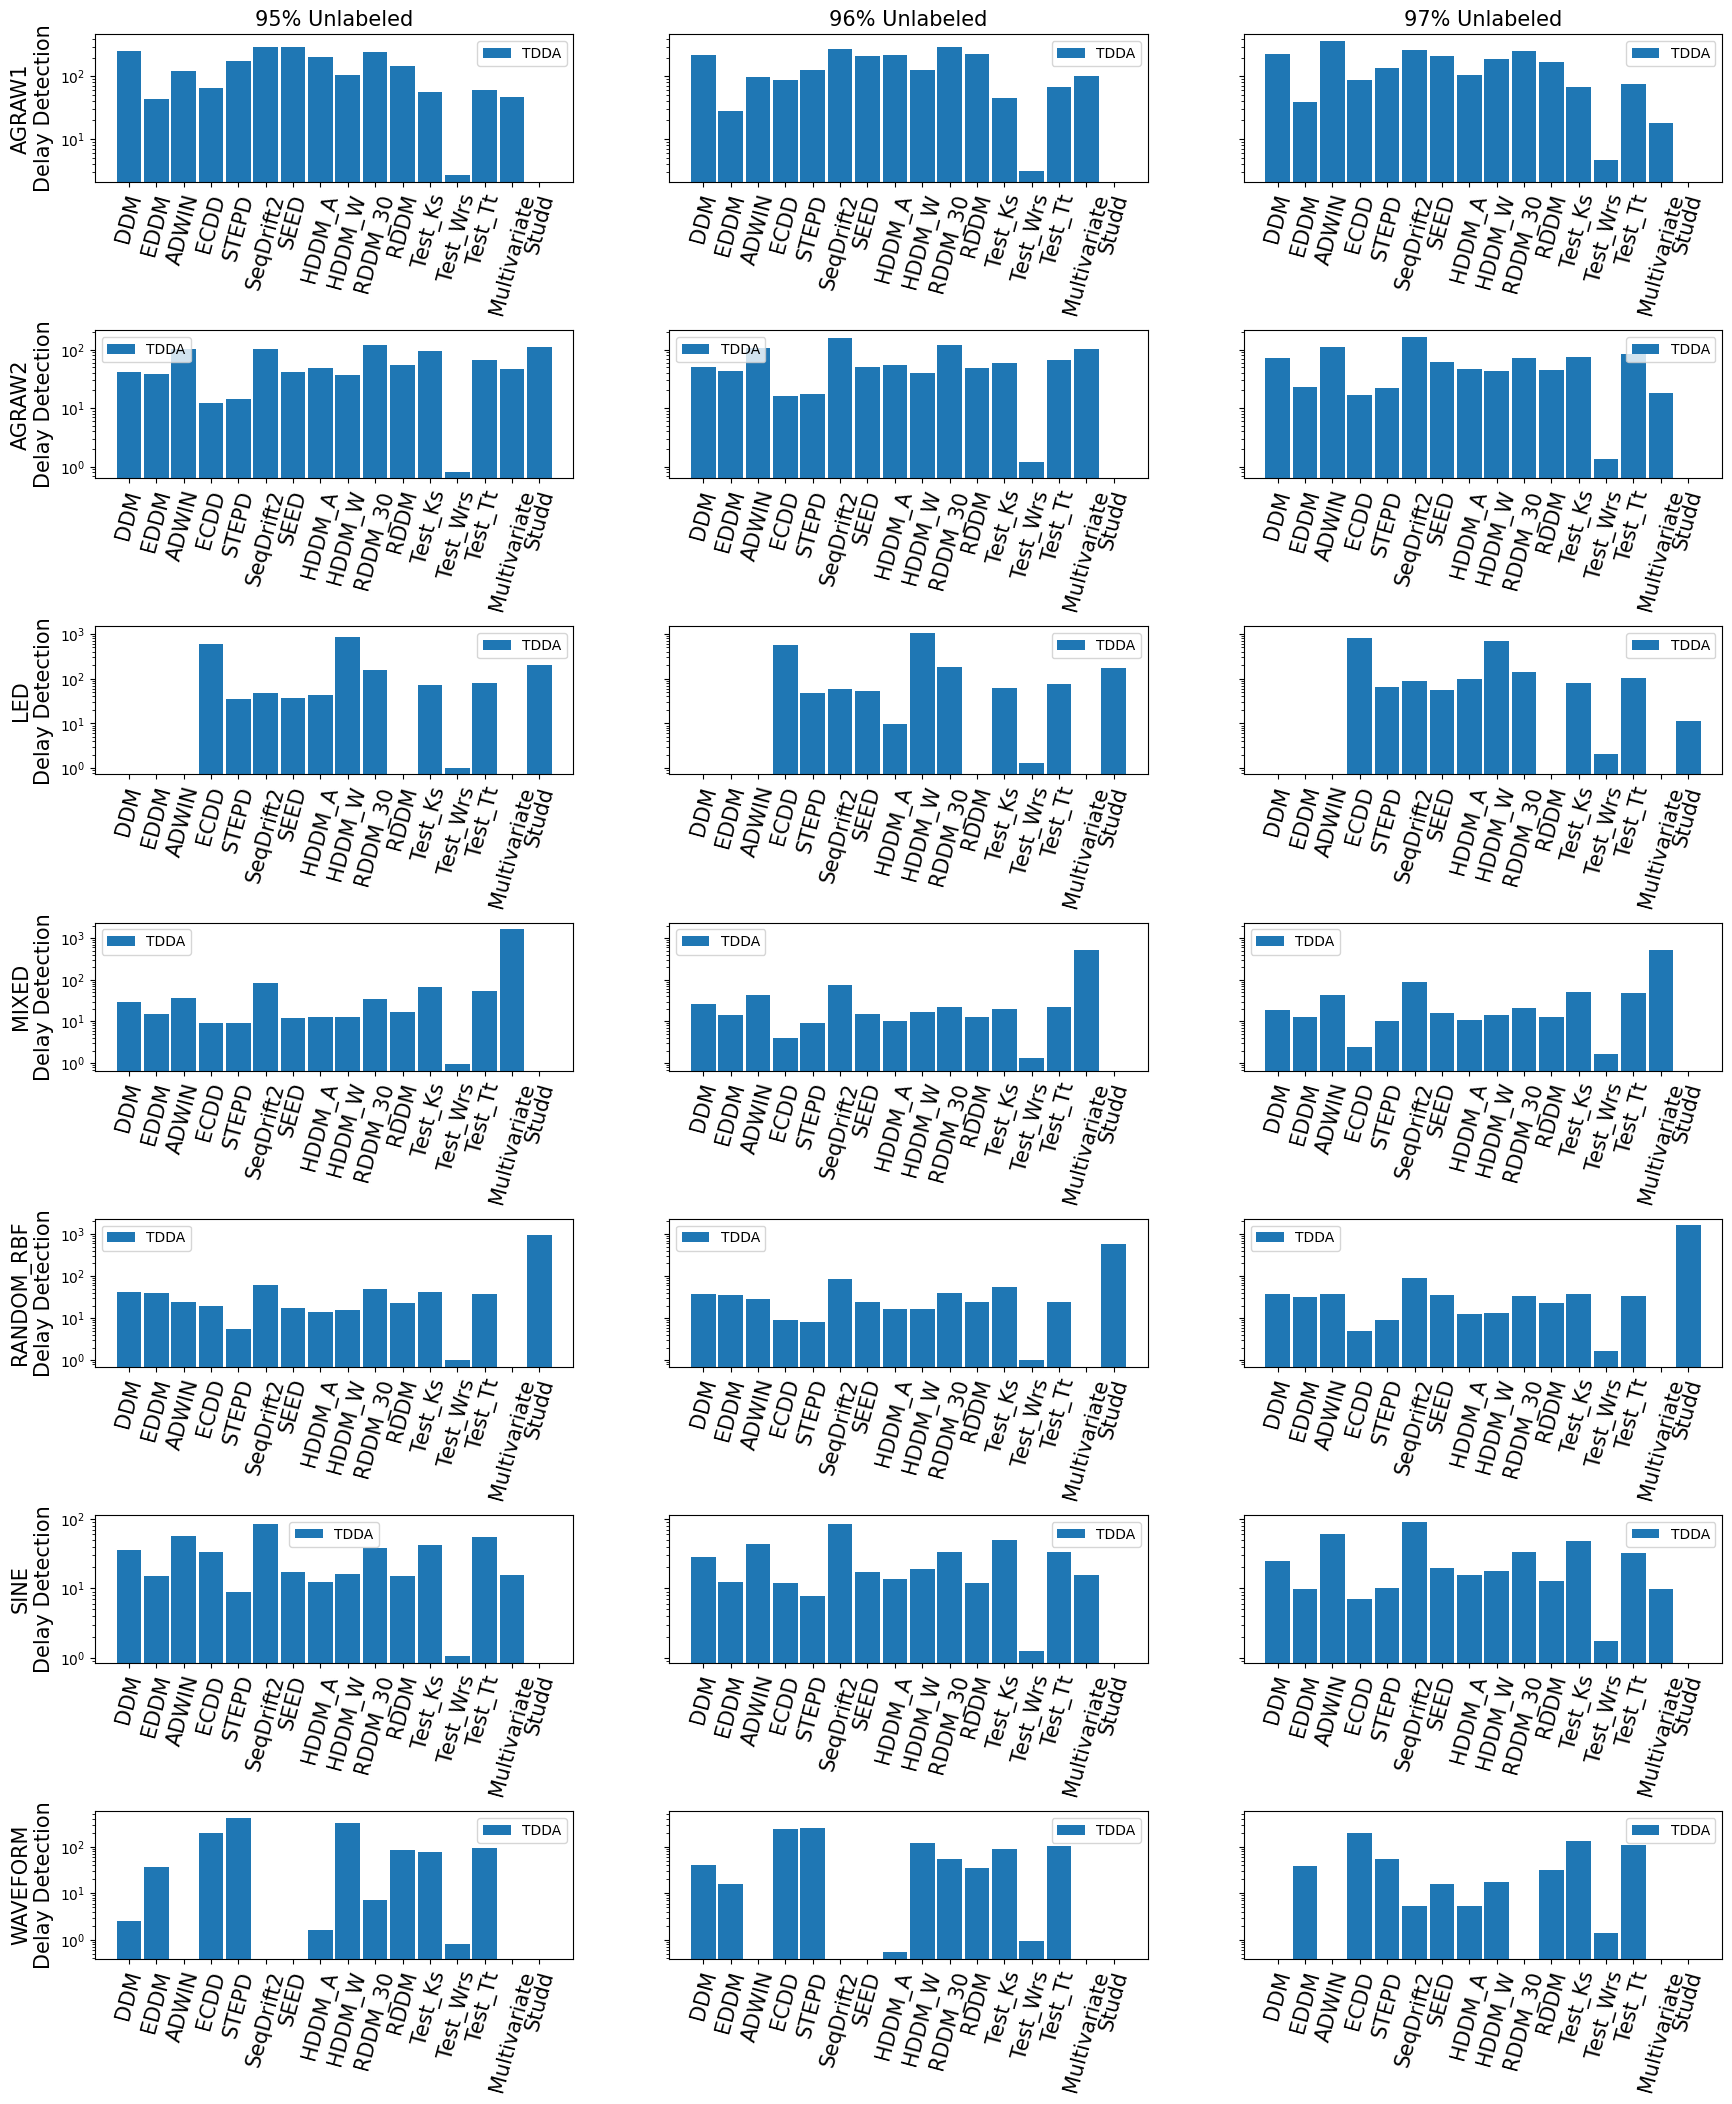

In [254]:
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [95, 96, 97]
type_drift = "Abrupt"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "delay true detection (average)"
metric_name_label = "Delay Detection"
label_bar = "TDDA"
df = pd.read_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv')
data_sets = ['AGRAW1', 'AGRAW2', 'LED', 'MIXED', 'RANDOM_RBF', 'SINE', 'WAVEFORM']
fig_size = (21,25)
generate_bar_plot_metric(df, data_sets, partialy_drift, metric_name_label, type_drift, drift_size, fig_size, label_bar, y_log=True)

## Abrupt Drift and Partially Labeled Data Stream 98%, 99% (TDDA)

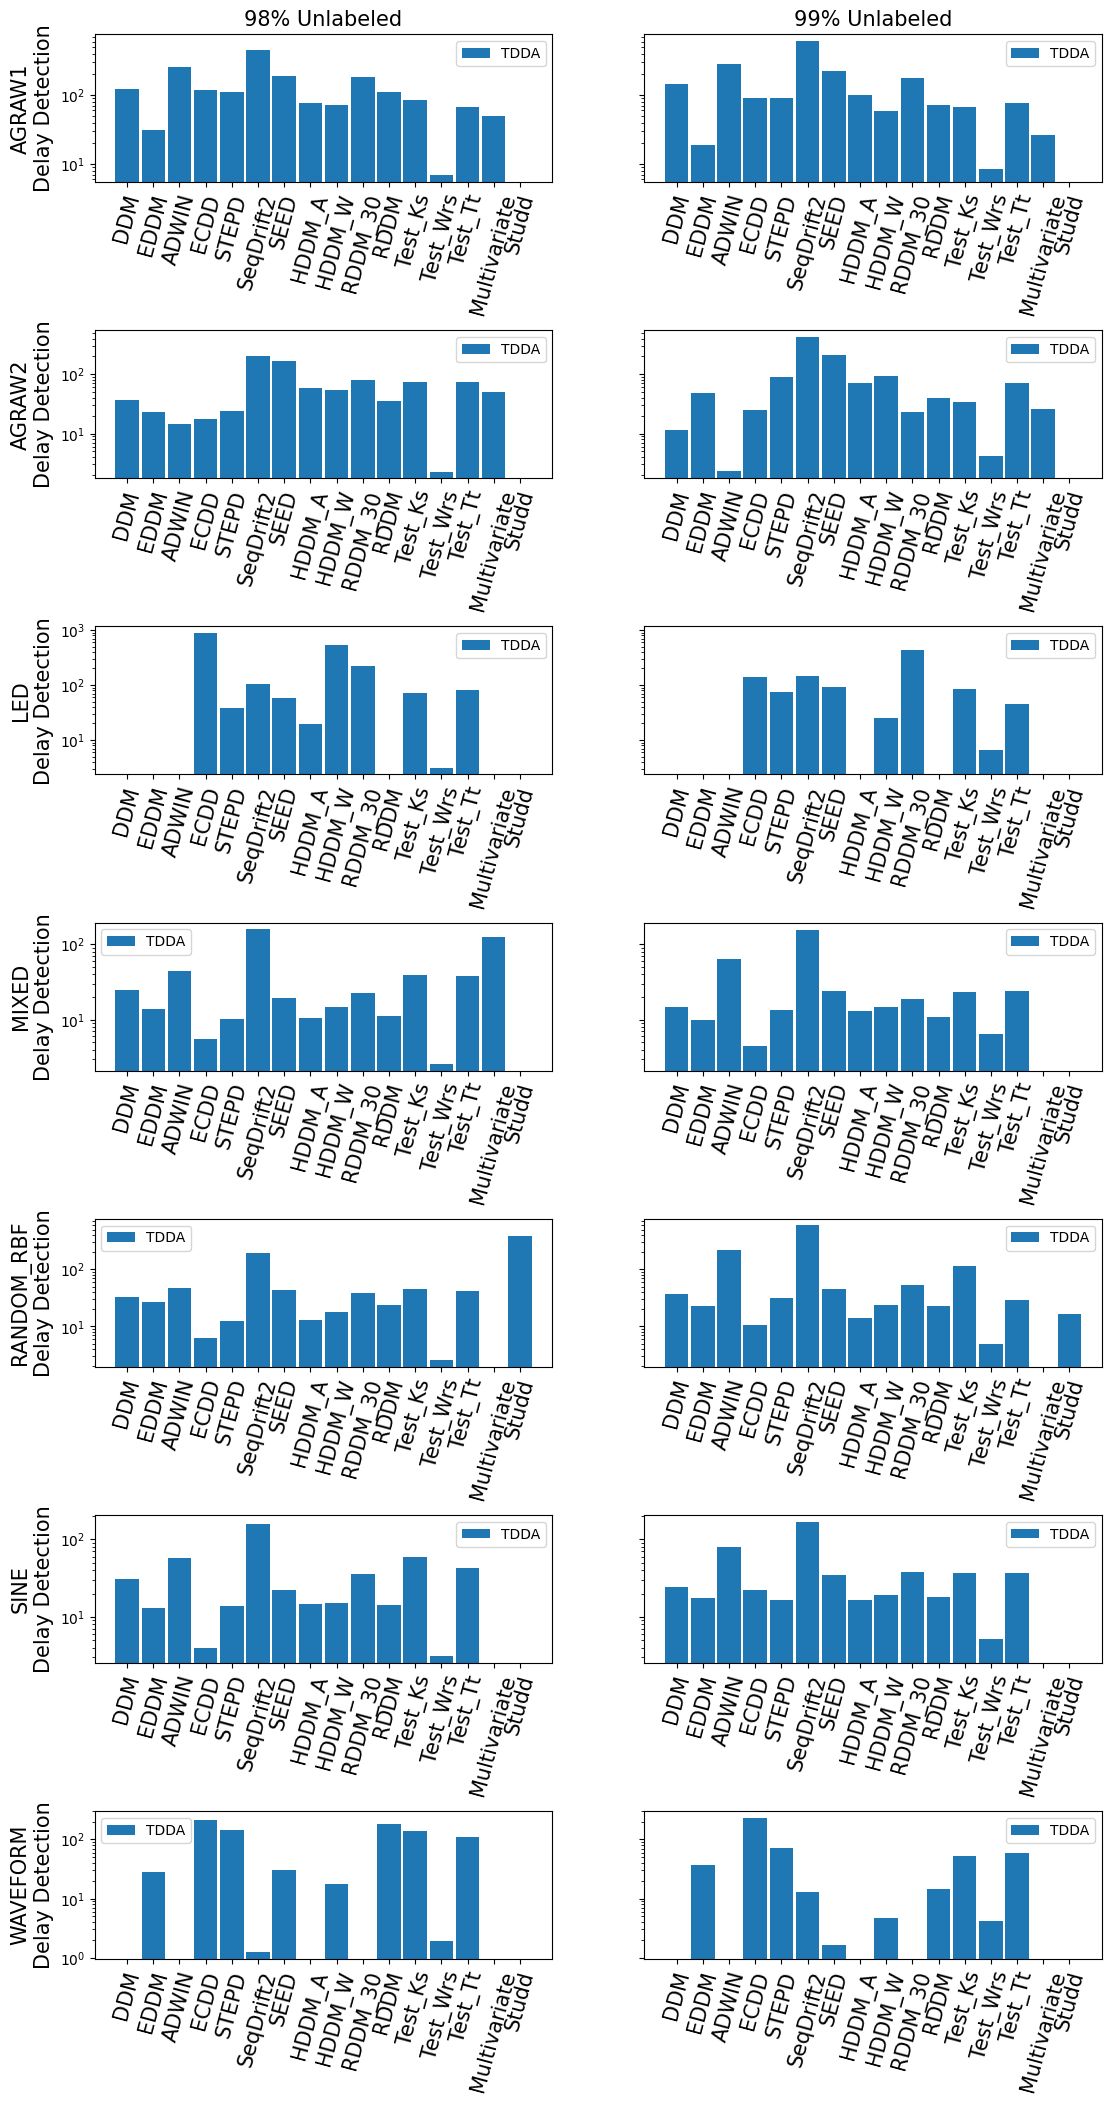

In [255]:
drift_size = 100000
#partialy_drift options: 95, 96, 97, 98, 99
partialy_drift = [98, 99]
type_drift = "Abrupt"
#metric name options: detected changes, detected warnings, delay detection (average), delay true detection (average), MTFA (average), MDR, true changes detected, 
metric_name = "delay true detection (average)"
metric_name_label = "Delay Detection"
label_bar = "TDDA"
df = pd.read_csv(f'../results/csv_aggregation/{type_drift}_{metric_name}_{drift_size}.csv')
data_sets = ['AGRAW1', 'AGRAW2', 'LED', 'MIXED', 'RANDOM_RBF', 'SINE', 'WAVEFORM']
fig_size = (13,25)
generate_bar_plot_metric(df, data_sets, partialy_drift, metric_name_label, type_drift, drift_size, fig_size, label_bar, y_log=True)